## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [18]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas usZipcode==1.0.1 sqlalchemy_mate==2.0.0.0 statsmodels -q --user


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\paluv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
import sys
print(sys.version)

3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [20]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,

)

#To build linear model for satistical analysis and prediction
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#library required for structured python code
from sklearn_pandas import DataFrameMapper

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style('darkgrid')
sns.set(color_codes=True)

#Remove the limit for number of displayed columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [21]:
# library required for structured Python code
from sklearn_pandas import DataFrameMapper


In [22]:
#Library to split the data
from sklearn.model_selection import train_test_split

#Library to build model for prediction
from sklearn.tree import DecisionTreeClassifier

#Library to build decision tree models
from sklearn import tree

#Library to build Logistic regression model
from sklearn.linear_model import LogisticRegression

#Library to get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

#Library to build linear model for statistical analysis and prediction
from sklearn.linear_model import LinearRegression



## Data Overview

* Observations
* Sanity checks

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
df = pd.read_csv('Loan_Modelling.csv')

In [25]:
#creating a copy of the dataset
df_copy = df.copy()

# **Data Structure Analysis**

In [26]:
#Viewing top observations from the dataset
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [27]:
#Viewing bottom observations from the dataset
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

**Observations:**


*   Age,experience and income indicate a wide range of numbers
*   ID is set as the index
*   Found mortgage has many 0's and 3 digit number indicating a skwed data
*   Zipcode can be restructured into county for easy analysis
*   Family and Education are under 5
*  Personal_loan,securities_account,CD_Account,Online and creditc ard are all
   binary values  





In [28]:
#Viewing the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB



## **Observation**
1.   There is no missing values listed
2.   Memory used is 547.0 KB
3.   There are 12 float integers and 1 float type columns.



In [29]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

# **Observation**

1.   There is no null present



In [30]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

**Observation**
1.  It give us an idea of number of unique values in each column.





In [31]:
#Checking the shape of the dataset
df.shape

(5000, 14)

There are 5000 rows and 13 columns in this dataframe.

In [32]:
#checking the duplicates
df.duplicated().sum()

0

## **Initial Data processing**

In [33]:
##library required to convert zipcode to county
import sys
print(sys.version)



3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [34]:
#user defined function
def zipcode_to_county(zipcode):
    from uszipcode import SearchEngine
    search = SearchEngine(simple_zipcode=True)
    result = search.by_zipcode(zipcode)
    return result.to_dict()['county']

    #library required to convert zipcode to county
from uszipcode import SearchEngine
import pandas as pd


def Zipcode_to_county(Zipc):
    search = SearchEngine()
    Zipcode = search.by_zipcode(Zipc)  # Converting zipcode to zipcode object
    if Zipcode:  # Checking if Zipcode object exists
        return Zipcode.county
    else:
        return None  # Return None if zipcode is not found


#applying the user defined function and creating a new column 'County'
# Check if 'zip_code' column exists, if not, try variations or check your data
if 'zip_code' in df.columns:
    df['county'] = df['zip_code'].apply(Zipcode_to_county)
else:

    possible_column_names = ['zipcode', 'zip_code', 'ZIPCODE']
    for col_name in possible_column_names:
        if col_name in df.columns:
            print(f"Found column '{col_name}', using it instead of 'zip_code'")
            df['county'] = df[col_name].apply(Zipcode_to_county)
            break
    else:
        print("No suitable column found in the DataFrame.")







No suitable column found in the DataFrame.


In [35]:
#Applying the user defined function and creating a new column 'County'
df['County'] = df['ZIPCode'].apply



In [36]:

search = SearchEngine()
df['County'] = df['ZIPCode'].apply(search.by_zipcode)
df['County'] = df['County'].apply(lambda x: x.to_dict()['county'] if x else None)
df.head(10)


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   
5              0                   0           0       1           0   
6              0                   0           0       1           0   
7              0                   0           0       0           1   
8              0                   0           0       1           0   
9              1                   0           0       0           0   

                 County  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County  
5      San Diego County  
6    Los Angeles County  
7       Monterey County  
8    Los Angeles County  
9        Ventura County

In [37]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
County                  38
dtype: int64

## **Observation**
467 unique values in ZIPCode decreased to 38 unique values in 'County'

In [38]:
#Making a list of columns
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County'],
      dtype='object')

In [39]:
df.describe(include="all")

ID          Age   Experience       Income       ZIPCode  \
count   5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean    2500.500000    45.338400    20.104600    73.774200  93169.257000   
std     1443.520003    11.463166    11.467954    46.033729   1759.455086   
min        1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%     1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%     2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%     3750.250000    55.000000    30.000000    98.000000  94608.000000   
max     5000.000000    67.000000    43.000000   224.000000  96651.000000   

             Family        CCAvg    Education     Mortgage  Personal_Loan  \
count   5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
unique          NaN          NaN          NaN          NaN            NaN   
top             NaN          NaN          NaN          NaN            NaN   
freq            NaN          NaN          NaN          NaN            NaN   
mean       2.396400     1.937938     1.881000    56.498800       0.096000   
std        1.147663     1.747659     0.839869   101.713802       0.294621   
min        1.000000     0.000000     1.000000     0.000000       0.000000   
25%        1.000000     0.700000     1.000000     0.000000       0.000000   
50%        2.000000     1.500000     2.000000     0.000000       0.000000   
75%        3.000000     2.500000     3.000000   101.000000       0.000000   
max        4.000000    10.000000     3.000000   635.000000       1.000000   

        Securities_Account  CD_Account       Online   CreditCard  \
count          5000.000000  5000.00000  5000.000000  5000.000000   
unique                 NaN         NaN          NaN          NaN   
top                    NaN         NaN          NaN          NaN   
freq                   NaN         NaN          NaN          NaN   
mean              0.104400     0.06040     0.596800     0.294000   
std               0.305809     0.23825     0.490589     0.455637   
min               0.000000     0.00000     0.000000     0.000000   
25%               0.000000     0.00000     0.000000     0.000000   
50%               0.000000     0.00000     1.000000     0.000000   
75%               0.000000     0.00000     1.000000     1.000000   
max               1.000000     1.00000     1.000000     1.000000   

                    County  
count                 4966  
unique                  38  
top     Los Angeles County  
freq                  1095  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN

In [40]:
# Printing top 5 unique values in each column

for i in df.columns:
    print("\nUnique values in", i, "are :")
    print(df[i].value_counts().head())
    print("\n")
    print("-" * 40)


Unique values in ID are :
ID
1       1
3331    1
3338    1
3337    1
3336    1
Name: count, dtype: int64


----------------------------------------

Unique values in Age are :
Age
35    151
43    149
52    145
54    143
58    143
Name: count, dtype: int64


----------------------------------------

Unique values in Experience are :
Experience
32    154
20    148
9     147
5     146
23    144
Name: count, dtype: int64


----------------------------------------

Unique values in Income are :
Income
44    85
38    84
81    83
41    82
39    81
Name: count, dtype: int64


----------------------------------------

Unique values in ZIPCode are :
ZIPCode
94720    169
94305    127
95616    116
90095     71
93106     57
Name: count, dtype: int64


----------------------------------------

Unique values in Family are :
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


----------------------------------------

Unique values in CCAvg are :
CCAvg
0.3    241
1.0    231
0.2 

## **Observation**


*   0's out-number 1 in Mortgage,Personal_Loan, Securities_Account, CD_Account and CreditCard coulmns.
*   Los Angeles County has the highest number of observations of 1095.
There is handful of counties with under 50 observations.



In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  County              4966 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 586.1

Datatypes of CCAvg is float and county is object.Rest of them are integers.

In [42]:
#Printing bottom 5 unique values in each column

for i in df.columns:
    print("\nUnique values in", i, "are :")
    print(df[i].value_counts().tail())
    print("\n")
    print("-" * 40)



Unique values in ID are :
ID
1667    1
1666    1
1665    1
1664    1
5000    1
Name: count, dtype: int64


----------------------------------------

Unique values in Age are :
Age
25    53
24    28
66    24
67    12
23    12
Name: count, dtype: int64


----------------------------------------

Unique values in Experience are :
Experience
-1     33
-2     15
 42     8
-3      4
 43     3
Name: count, dtype: int64


----------------------------------------

Unique values in Income are :
Income
202    2
203    2
189    2
224    1
218    1
Name: count, dtype: int64


----------------------------------------

Unique values in ZIPCode are :
ZIPCode
96145    1
94087    1
91024    1
93077    1
94598    1
Name: count, dtype: int64


----------------------------------------

Unique values in Family are :
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


----------------------------------------

Unique values in CCAvg are :
CCAvg
3.25    1
3.67    1
4.67    1
8.90    1
2

# **Observation**
*   There are negative values in 'Experience' that needs to be fixed
*   There are counties under 5 observations as opposed to Los Angeles County with 1095 observations.


In [43]:
df[df['Experience'] < 0].value_counts().sum()

51



*   Overall 51 rows with negative experience




In [44]:
df[df['Experience'] < 0].sort_values(by='Experience', ascending=True)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4514  4515   24          -3      41    91768       4   1.00          3   
2618  2619   23          -3      55    92704       3   2.40          2   
4285  4286   23          -3     149    93555       2   7.20          1   
3626  3627   24          -3      28    90089       4   1.00          3   
2717  2718   23          -2      45    95422       4   0.60          2   
2876  2877   24          -2      80    91107       2   1.60          3   
3130  3131   23          -2      82    92152       2   1.80          2   
2466  2467   24          -2      80    94105       2   1.60          3   
3796  3797   24          -2      50    94920       3   2.40          2   
2962  2963   23          -2      81    91711       2   1.80          2   
793    794   24          -2     150    94720       2   2.00          1   
3887  3888   24          -2     118    92634       2   7.20          1   
889    890   24          -2      82    91103       2   1.60          3   
597    598   24          -2     125    92835       2   7.20          1   
315    316   24          -2      51    90630       3   0.30          3   
451    452   28          -2      48    94132       2   1.75          3   
4116  4117   24          -2     135    90065       2   7.20          1   
4481  4482   25          -2      35    95045       4   1.00          3   
4411  4412   23          -2      75    90291       2   1.80          2   
4015  4016   25          -1     139    93106       2   2.00          1   
3157  3158   23          -1      13    94720       4   1.00          1   
3279  3280   26          -1      44    94901       1   2.00          2   
3284  3285   25          -1     101    95819       4   2.10          3   
3292  3293   25          -1      13    95616       4   0.40          1   
3394  3395   25          -1     113    90089       4   2.10          3   
3425  3426   23          -1      12    91605       4   1.00          1   
4088  4089   29          -1      71    94801       2   1.75          3   
3824  3825   23          -1      12    95064       4   1.00          1   
3946  3947   25          -1      40    93117       3   2.40          2   
3076  3077   29          -1      62    92672       2   1.75          3   
89      90   25          -1     113    94303       4   2.30          3   
2848  2849   24          -1      78    94720       2   1.80          2   
226    227   24          -1      39    94085       2   1.70          2   
524    525   24          -1      75    93014       4   0.20          1   
536    537   25          -1      43    92173       3   2.40          2   
540    541   25          -1     109    94010       4   2.30          3   
576    577   25          -1      48    92870       3   0.30          3   
583    584   24          -1      38    95045       2   1.70          2   
649    650   25          -1      82    92677       4   2.10          3   
670    671   23          -1      61    92374       4   2.60          1   
2980  2981   25          -1      53    94305       3   2.40          2   
686    687   24          -1      38    92612       4   0.60          2   
1173  1174   24          -1      35    94305       2   1.70          2   
1428  1429   25          -1      21    94583       4   0.40          1   
1522  1523   25          -1     101    94720       4   2.30          3   
1905  1906   25          -1     112    92507       2   2.00          1   
2102  2103   25          -1      81    92647       2   1.60          3   
2430  2431   23          -1      73    92120       4   2.60          1   
2545  2546   25          -1      39    94720       3   2.40          2   
4582  4583   25          -1      69    92691       3   0.30          3   
909    910   23          -1     149    91709       1   6.33          1   
4957  4958   29          -1      50    95842       2   1.75          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4514        


**Observation**
*   There are 51 rows with negative values for Experience
*   Let's look at the corresponding age, education and income values for any pattern.



In [45]:
df[df['Experience']<0]["Age"].value_counts()

Age
25    18
24    17
23    12
29     3
28     1
26     1
Name: count, dtype: int64

In [46]:
df[df["Experience"]<0]["Education"].value_counts()

Education
3    20
2    16
1    16
Name: count, dtype: int64

In [47]:
df[df["Experience"]<0]["Income"].value_counts()

Income
82     3
113    2
149    2
12     2
80     2
39     2
81     2
101    2
50     2
35     2
13     2
38     2
75     2
48     2
62     1
40     1
139    1
71     1
28     1
135    1
41     1
44     1
118    1
73     1
53     1
78     1
45     1
55     1
112    1
21     1
150    1
61     1
125    1
109    1
43     1
51     1
69     1
Name: count, dtype: int64



*   Considering the corresponding Age,education,and incoe values, there does not seem to be any pattern and hence the negative value in expeience could most probably be a data entry error. Therefore will convert these values to absolute values instead of treating them as missing values.



In [48]:
#user defined function to convert negative values to absolute values

def convert_to_absolute(value):
    if value < 0:
        return abs(value)
    else:
        return value

In [49]:
df['Experience'] = df['Experience'].apply(convert_to_absolute)

In [50]:
df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

There is no more negative values in Experience.

In [51]:
#Checking the statistical summary of the dataset
df.describe().T


count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.134600    11.415189      0.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0



*   There are 5000 observations present in all
*   The minimum and maximum values indicate a widely spread in Age,Experience,Income and Mortgage
*.  Differences between mean and medium values indicate skewness in the data.



## **Exploratory Data Analysis.**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

# Univariate Analysis

In [52]:
#Defining a method to print the value counts in the plots

def val_count(plot, feature):
    for p in ax.patches:
        ax.annotate(  # annotate the count
            p.get_height(),
            (
                p.get_x() + p.get_width() / 2.0,  # calculating the value counts
                p.get_height(),
            ),
            ha="center",  # horizontal alignment of the text
            va="center",  # vertical alignment
            xytext=(0, 5),  # text position
            textcoords="offset points",  # offset in points from the xy value
        )

In [53]:
#Defining a method to print the percentage of data points in the plot

def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

In [54]:
# Defining a method to plot histogram and boxplot combined in a single plot


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="green"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram


In [55]:
#setting the color palette for the plots
sns.set_palette("husl")

# 1. Age

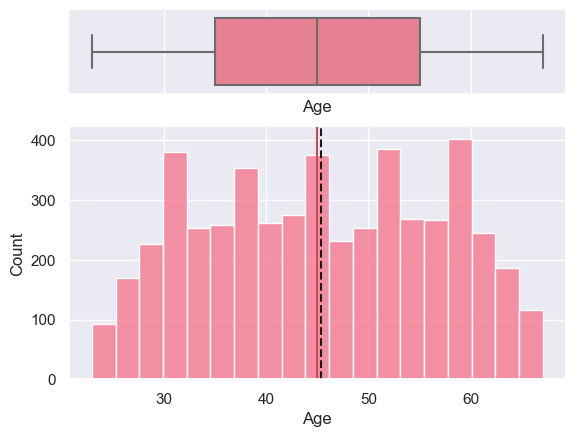

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot Histogram and boxplot combined in a single
def histogram_boxplot(data, feature):
  fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
  sns.boxplot(data=data, x=feature, ax=ax_box)
  sns.histplot(data=data, x=feature, ax=ax_hist)
  ax_box.set(yticks=[])
  sns.despine(ax=ax_hist)
  sns.despine(ax=ax_box, left=True)
histogram_boxplot(df, "Age")
#Add mean to the histogram
plt.axvline(df["Age"].mean(), color="k", linestyle="--")
#Add median to the histogram
plt.axvline(df["Age"].median(), color="r", linestyle="-")

**Observation


1.   The uniform distribution with five peak values are present in the histogram.
2.  Mean and Median are very close to each other
3. The boxplot indicates no outliers.



# 2. Experience

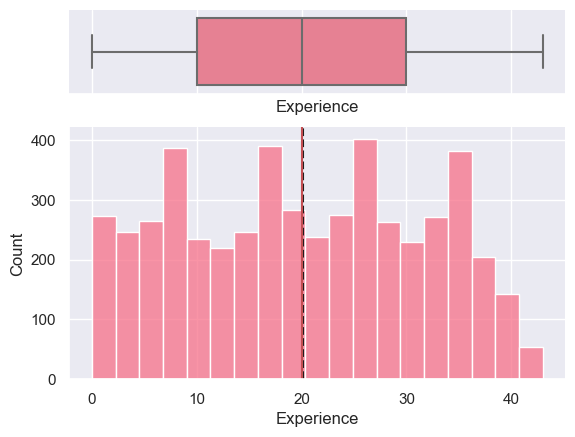

In [57]:
histogram_boxplot(df, "Experience")
#Add mean to the histogram
plt.axvline(df["Experience"].mean(), color="k", linestyle="--")
#Add median to the histogram
plt.axvline(df["Experience"].median(), color="r", linestyle="-")

* Mean and median are same
* Boxplot show no outliers
* The histrogram shows a uniform distribution with five peak values as like age

## 3. Income

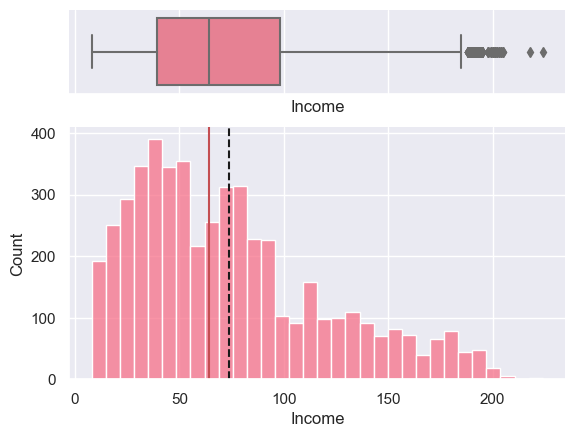

In [58]:
histogram_boxplot(df, "Income")
#Add mean to the histogram
plt.axvline(df["Income"].mean(), color="k", linestyle="--")
#Add median to the histogram
plt.axvline(df["Income"].median(), color="r", linestyle="-")

The distributon in the boxplot is right skewed. The outliers spotted above the upper whisker in the boxplot. The mean and medium are same.

# 4. Family

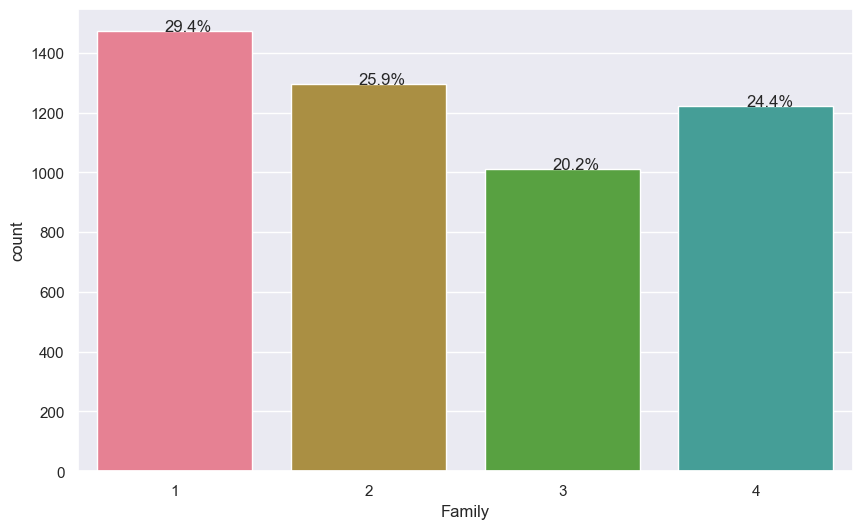

In [59]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Family")
perc_on_bar(ax, df["Family"])



1.   Maximum number of customers are with a family size of 1.The next family sizes which have more percentage are 2 and 4
2.   The least family size in the graph is 3(20.2%)


# 5. Credit Card Average

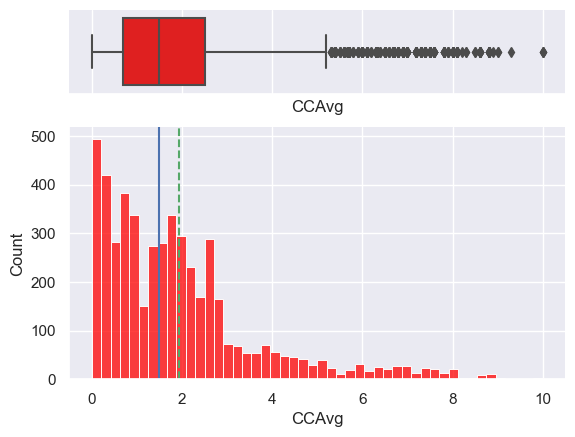

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
def histogram_boxplot(data, feature):
  fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
  sns.boxplot(data=data, x=feature, ax=ax_box, color='red')
  sns.histplot(data=data, x=feature, ax=ax_hist, color='red')
  ax_box.set(yticks=[])
  sns.despine(ax=ax_hist)
  sns.despine(ax=ax_box, left=True)
  

# plot Histogram and boxplot combined in a single
histogram_boxplot(df, "CCAvg")
#Add mean to the histogram
plt.axvline(df["CCAvg"].mean(), color="g", linestyle="--")
#Add median to the histogram
plt.axvline(df["CCAvg"].median(), color="b", linestyle="-")


* Right skewed data
* Outliers above the upper whisker

# 6. Education

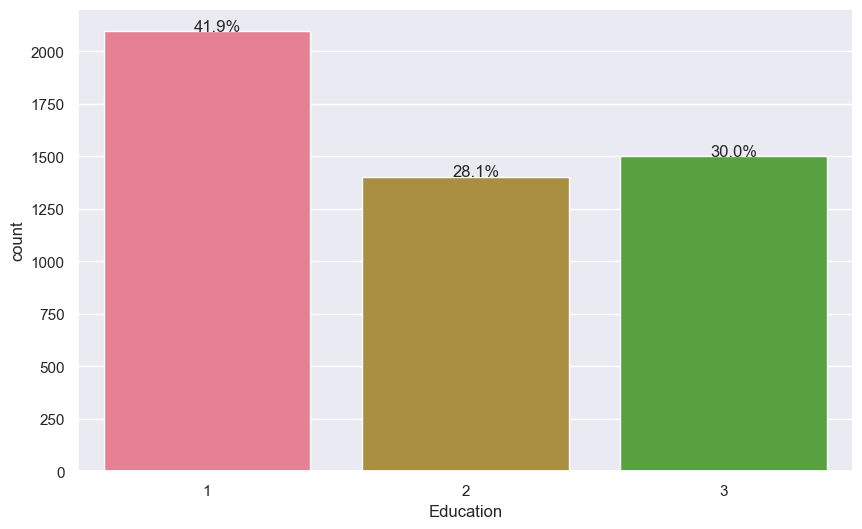

In [61]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Education")
perc_on_bar(ax, df["Education"])


*   Highest percentage of customer are under graduates

*  About 28% of the customers are graduates

*  Above 305 of them are advanced/professionals

*   The distribution suggests that 'Education' can be treated as category.





# 7.Mortgage

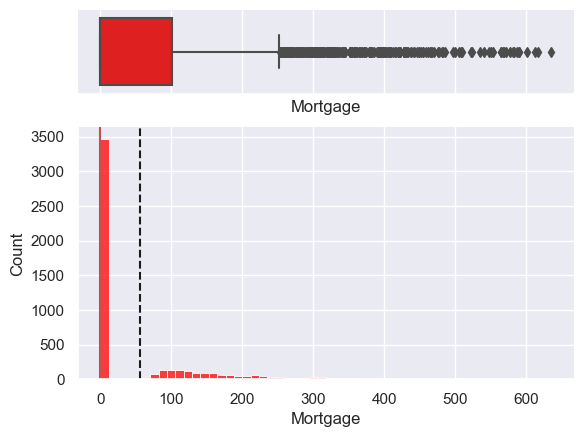

In [62]:
histogram_boxplot(df, "Mortgage")
#Add mean to the histogram
plt.axvline(df["Mortgage"].mean(), color="k", linestyle="--")
#Add median to the histogram
plt.axvline(df["Mortgage"].median(), color="r", linestyle="-")


1.  Highly skewed towards '0'
2.  Maximum number of customers do not have mortgage
3. Outliers spotted above the upper whisker
4. Most do further analysis to determine if 'Mortgage'can also be treated as category.


# 8. Personal Loan

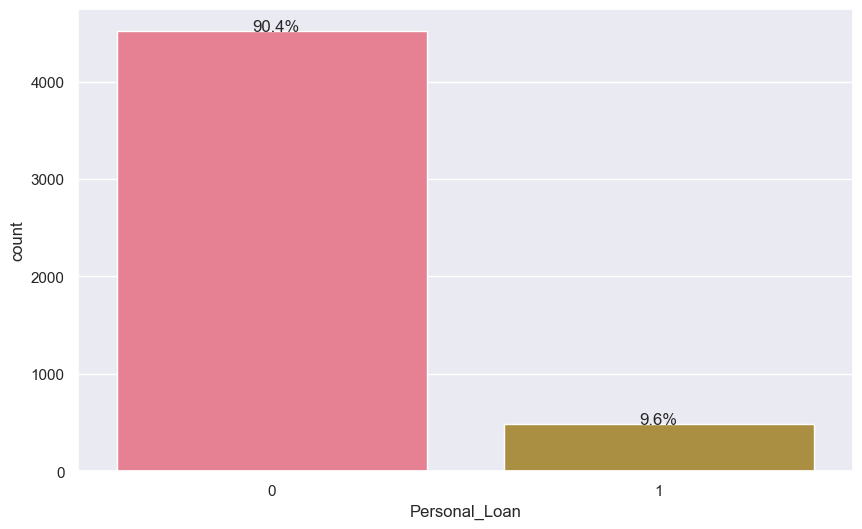

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data manipulation


plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Personal_Loan")

perc_on_bar(ax, df["Personal_Loan"])

1.It is found that around 90% of the customers did not accept the personal loan offered in the previous campaign.
2.There is only minimum amount of 9.6% of customers have accepted the personal loan.

# 9. Securities

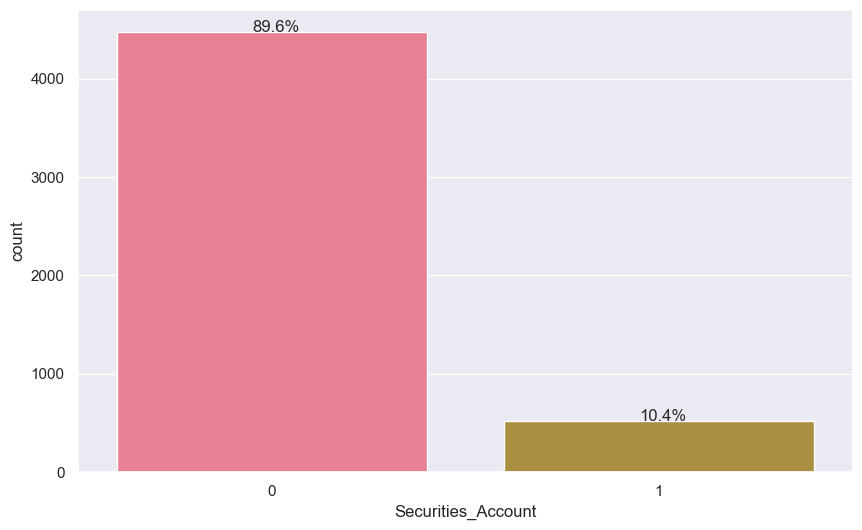

In [64]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Securities_Account")
perc_on_bar(ax, df["Securities_Account"])


Only 10.4% of the customers hold a securities account; The majority of te customers don't have this account.

# 10. Certificate of Deposit Account

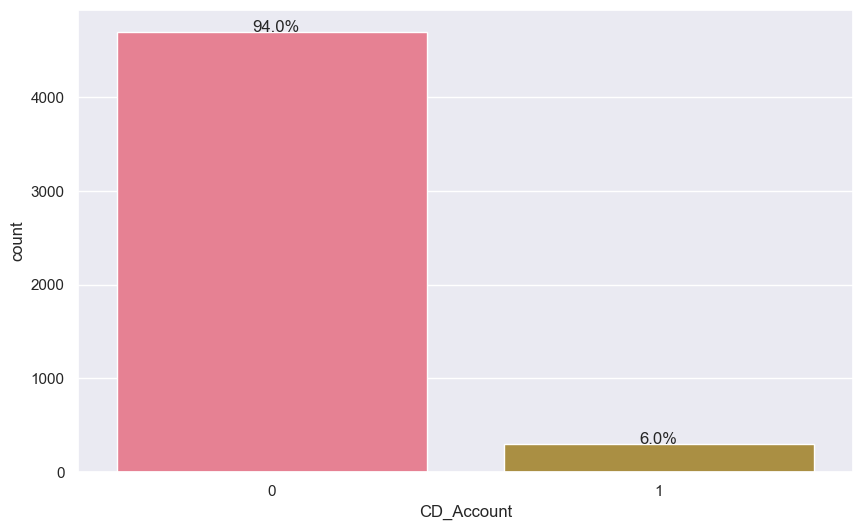

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="CD_Account")
perc_on_bar(ax, df["CD_Account"])

Only 6% of te customers hold a CD account; 94% of the customer don't have CD account.

# 11. Online

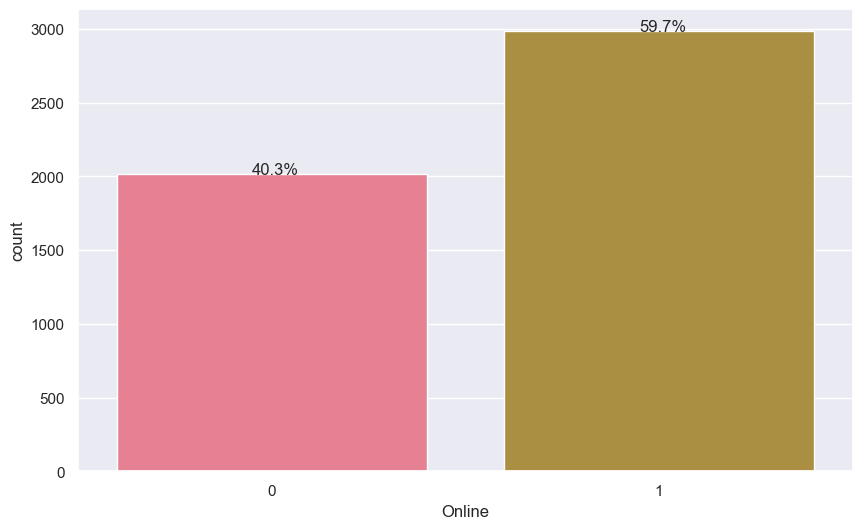

In [66]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Online")
perc_on_bar(ax, df["Online"])

59.7% of the customers utilise internet banking facilities while 40.3% of them don't utilize online banking.

# 12.Credit Card

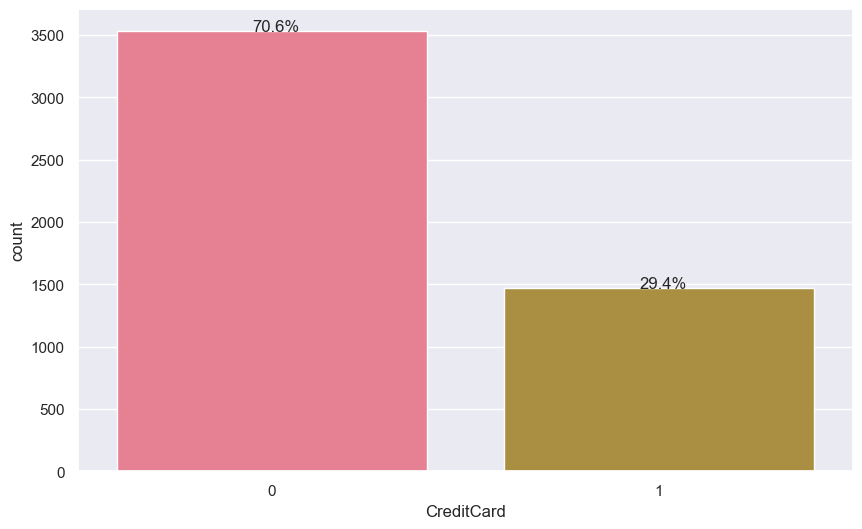

In [67]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="CreditCard")
perc_on_bar(ax, df["CreditCard"])

29.4% of customers use a credit card issues by other banks while 70.6% of the customers don't have credit cards.

# 13.county

<function matplotlib.pyplot.show(close=None, block=None)>

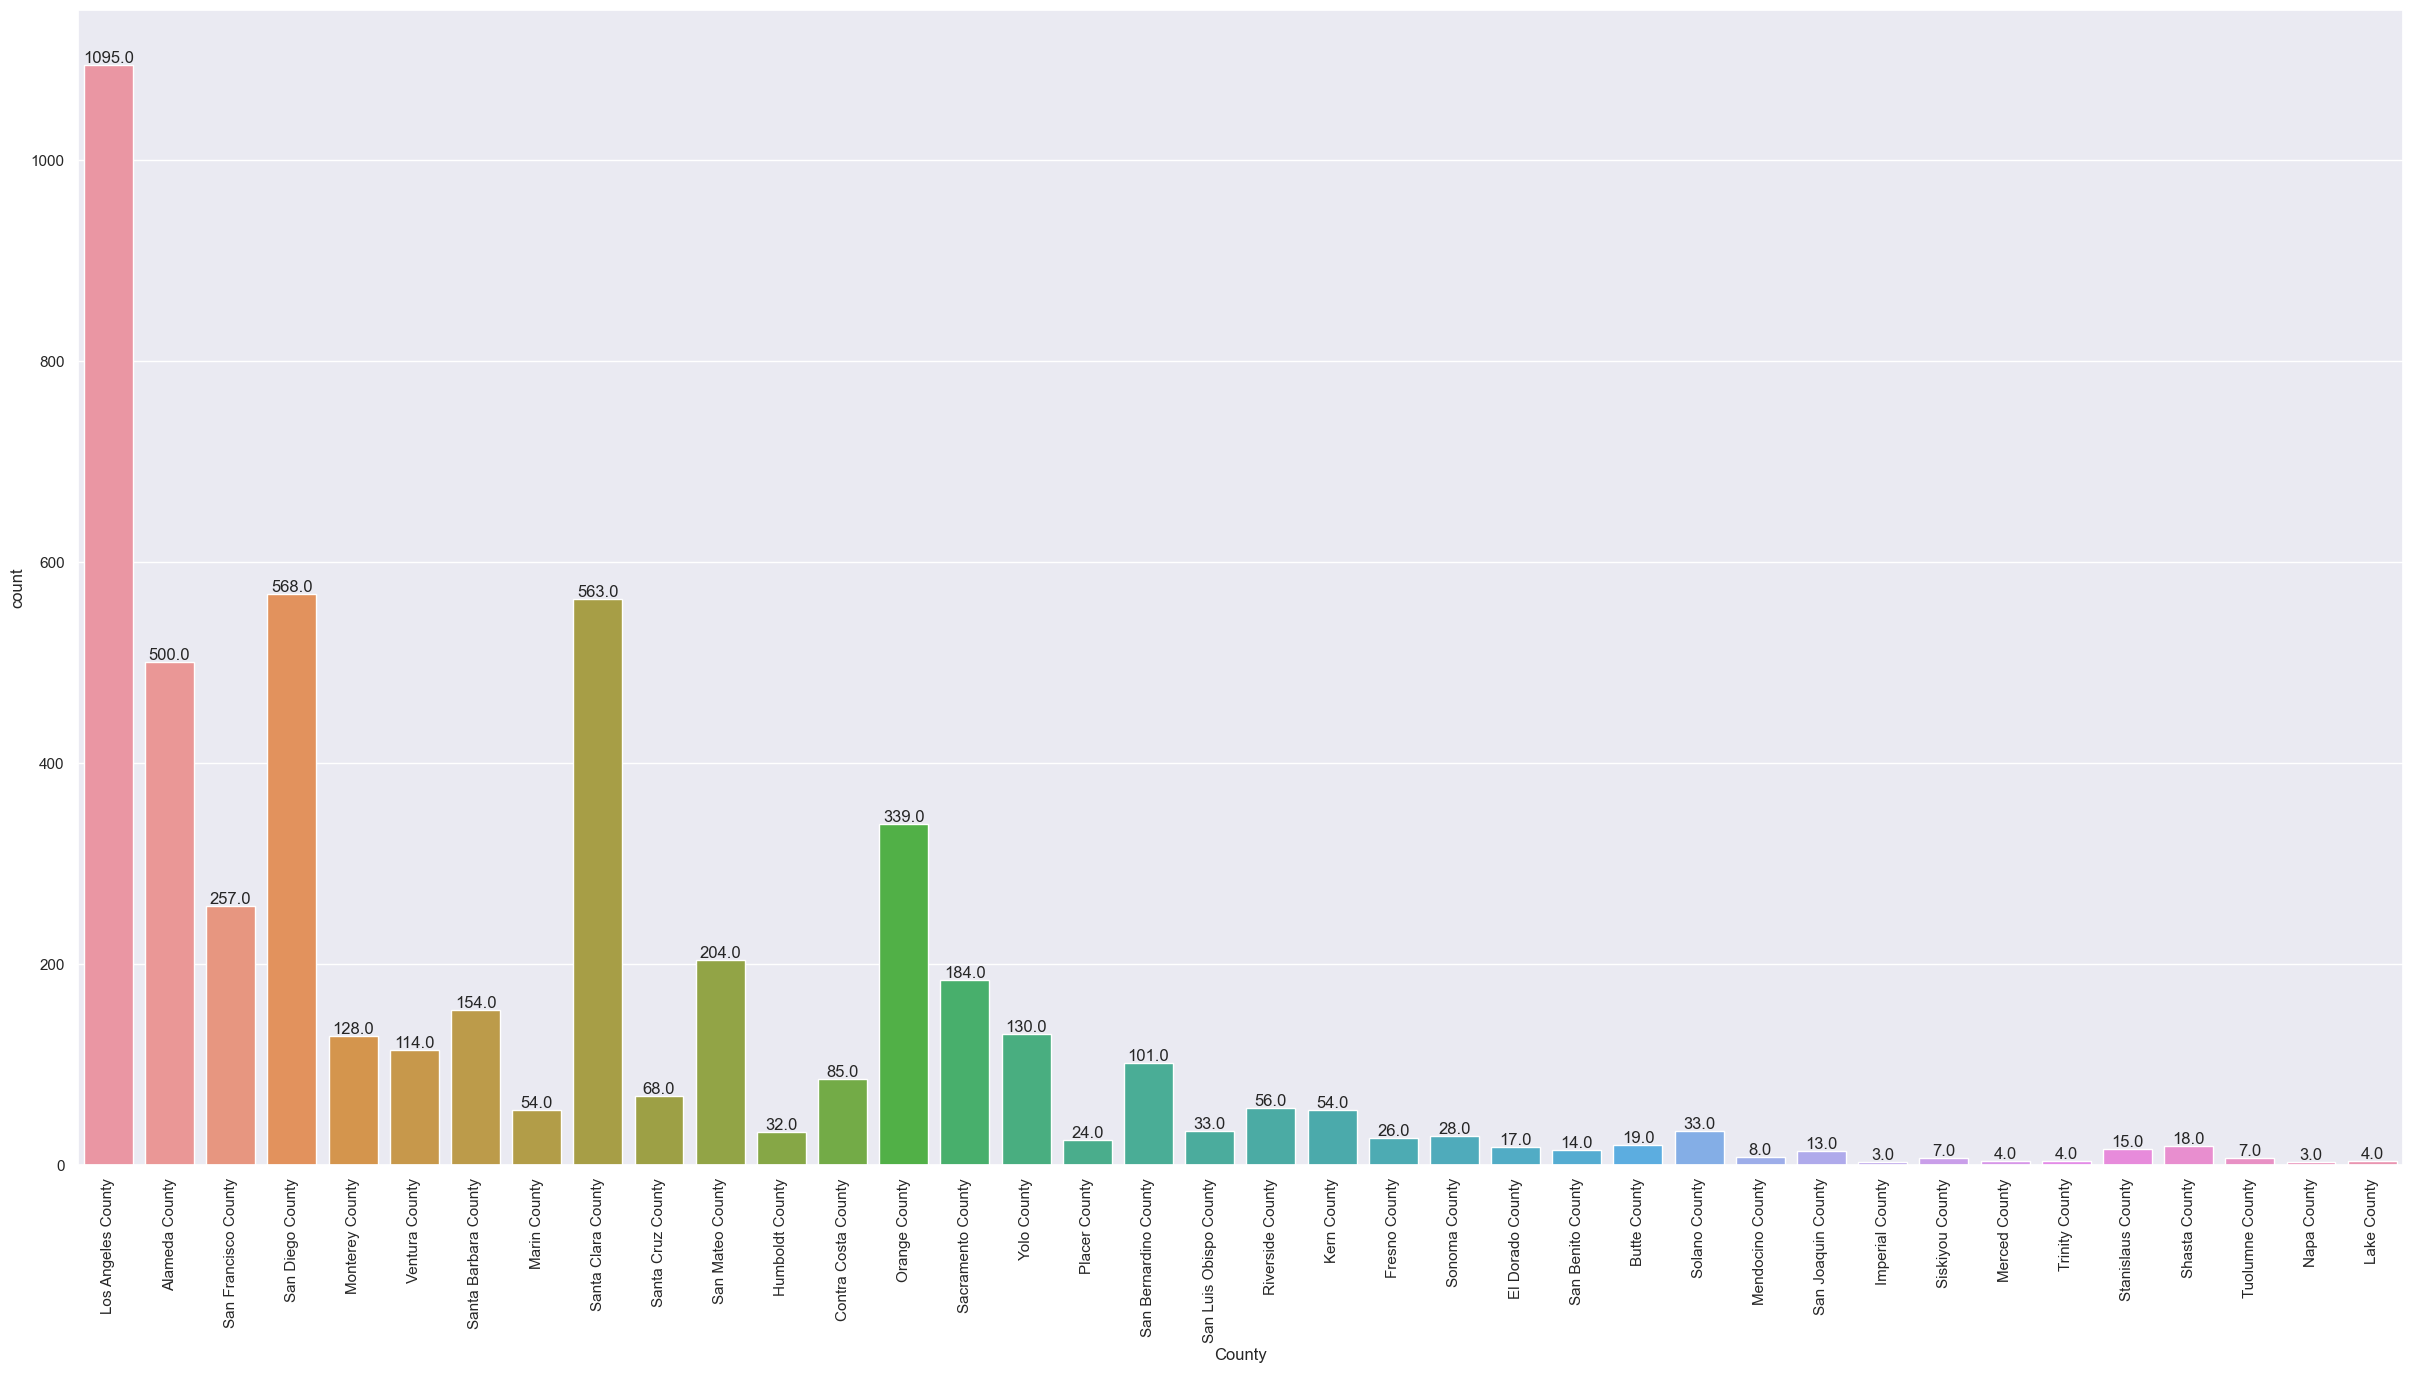

In [68]:
plt.figure(figsize=(30, 15))
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data manipulation

ax = sns.countplot(data =df, x=df['County'])
#creating a countplot and assigning it to variable ax
val_count(ax, "County")
#Labelled on the plot
plt.xticks(rotation=90)
plt.show


Los Angeles county has the highest number of observations of 1095.
There is handful of counties with under 50 observations.

# Bivariate Analysis

In [69]:
## Function to plot stacked bar chart


def stacked_plot(x):
    # sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(0, 1))
    plt.xticks(rotation=0)
    plt.show()

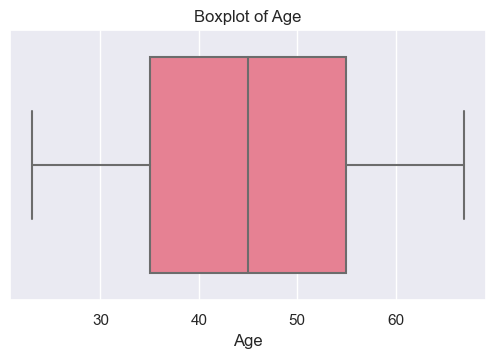

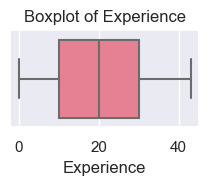

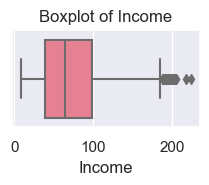

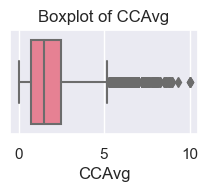

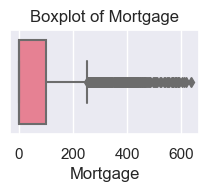

In [70]:
# outlier detection using boxplot
import seaborn as sns
import matplotlib.pyplot as plt
#convert categorical data into numerical data
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    # Check if the feature exists in the DataFrame before plotting
    if feature in df.columns:
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot of {feature}')
        plt.xlabel(feature)
        plt.tight_layout()
        plt.show()
    else:

      print(f"Feature '{feature}' not found in the DataFrame.")
      continue





1. Pesonal Loan VS Age


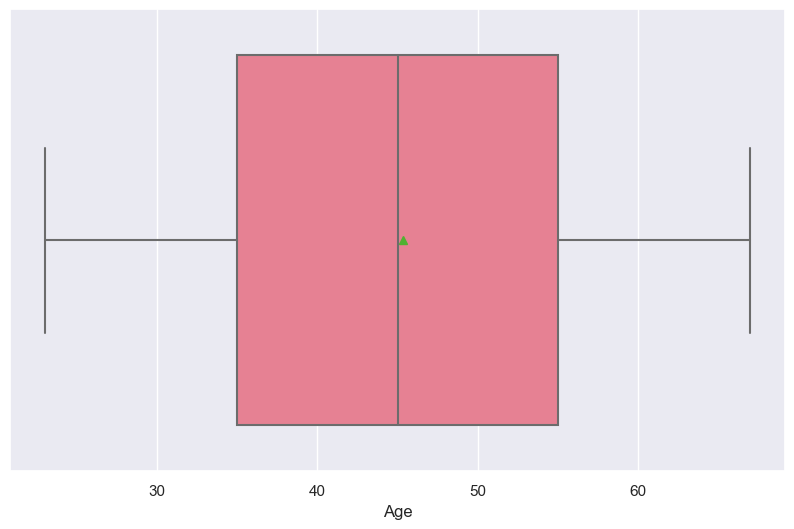

In [71]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Age", hue="Personal_Loan", showmeans=True)


1. The IQR of the age of customers who accepted the personal loan and those rejected the personal loan are both same.
2. Both have the same mean values
3. No outliers spotted on both boxplots

2. Personal Loan VS Experience

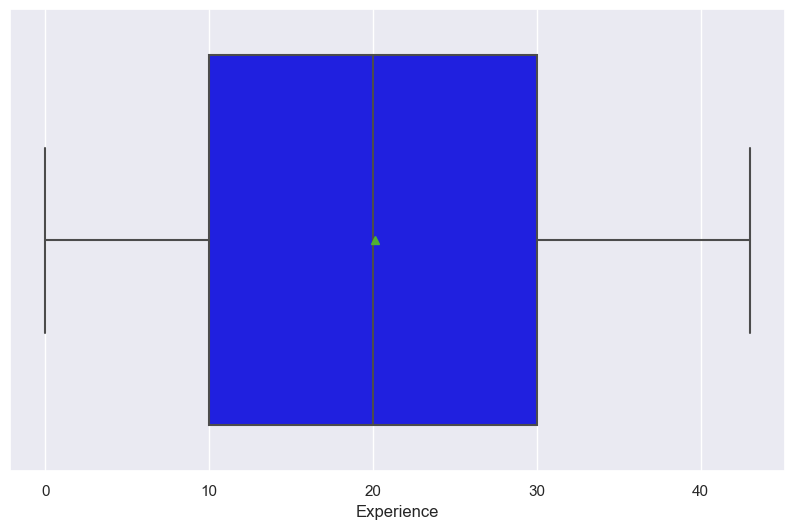

In [72]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Experience", hue="Personal_Loan", showmeans=True, color='blue')
plt.show()


1. The mean of both boxplots are almost same
2. The IQR ofthe experince of customers is almost similar for those accepted and rejected the loan
3. No outliers are spotted.

3. Personal Loan VS Income

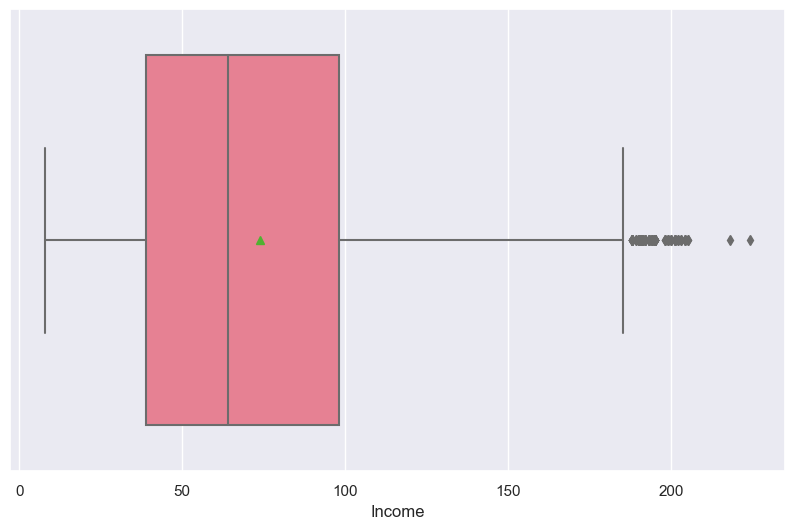

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Income", hue="Personal_Loan", showmeans=True)
plt.show()

* Customers with higher average annual income seem to have accepted the personal loan
* The minimum average incoem of customers who accepted the loan is around $60000.00
* Outliers spotted above the upper whisker for the ones with no personal loan

4. Personal Loan VS Family

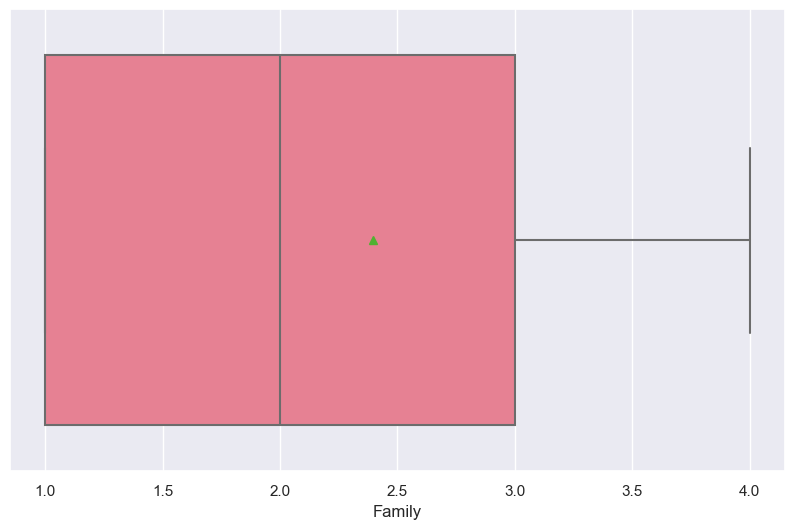

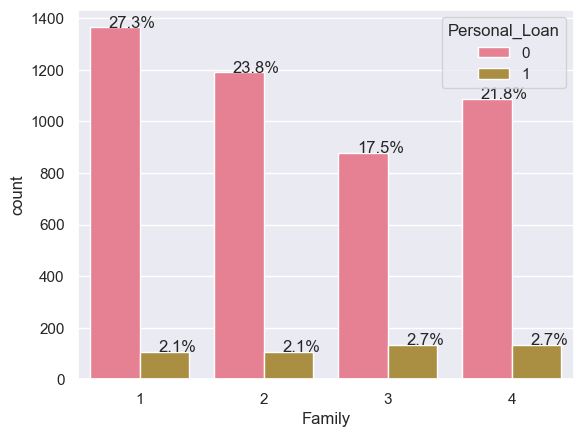

array([4, 3, 1, 2], dtype=int64)

In [74]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Family", hue="Personal_Loan", showmeans=True)
plt.show()

ax = sns.countplot(data=df, x="Family", hue="Personal_Loan")
perc_on_bar(ax, df["Family"])
df["Family"].value_counts()
df["Family"].unique()



1. These two graphs indicates that family size does not make a significant impact in making the choice of a loan
2. On boxplot, we can see taht customers with a family of 3 out numbers the rest in accpeting the loan.

5. Personal Loan VS Credit Card Average

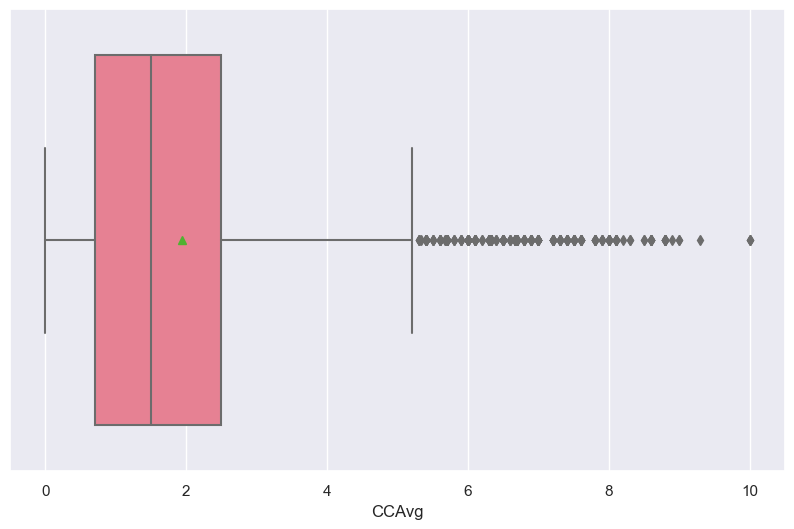

In [75]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="CCAvg", hue="Personal_Loan", showmeans=True)
plt.show()

1. It is easy to understand from the boxplot that the customers who spent more on credit card per month on an average,seem to take personal loan compares to other customers.

6. Personal Loan VS Education


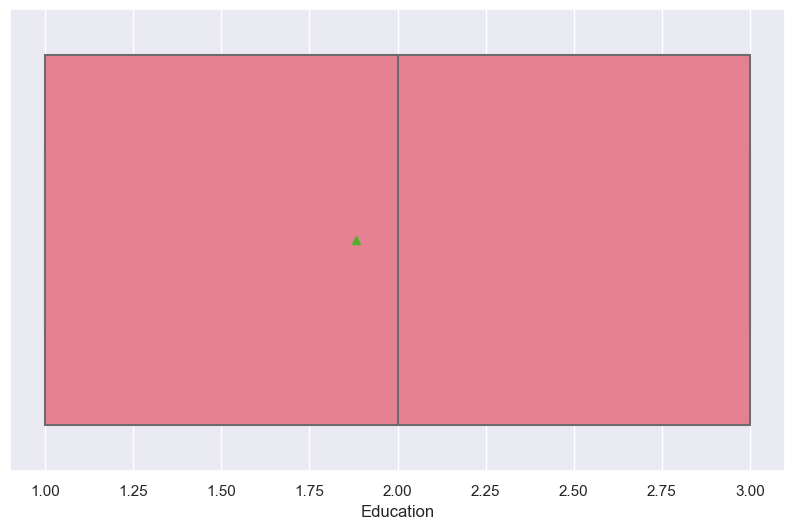

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


In [76]:
def stacked_plot(x):
    """
    Creates a stacked bar plot showing the distribution of 'Personal_Loan'
    across different categories of the given column 'x'.

    Args:
        x: The column to use for the x-axis of the plot.
    """
    # sns.set(palette="nipy_spectral")
    # Replace 'data' with 'df' to use the correct DataFrame
    tab1 = pd.crosstab(x, df["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    # ... (Rest of your stacked_plot function)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Education", hue="Personal_Loan", showmeans=True)
plt.show()
stacked_plot(df["Education"])



1.   Customer with graduate and advanced/profession levels of education have higher preference for personal loan than those customers who are Undergraduates.




7. Personal Loan Vs Mortagage

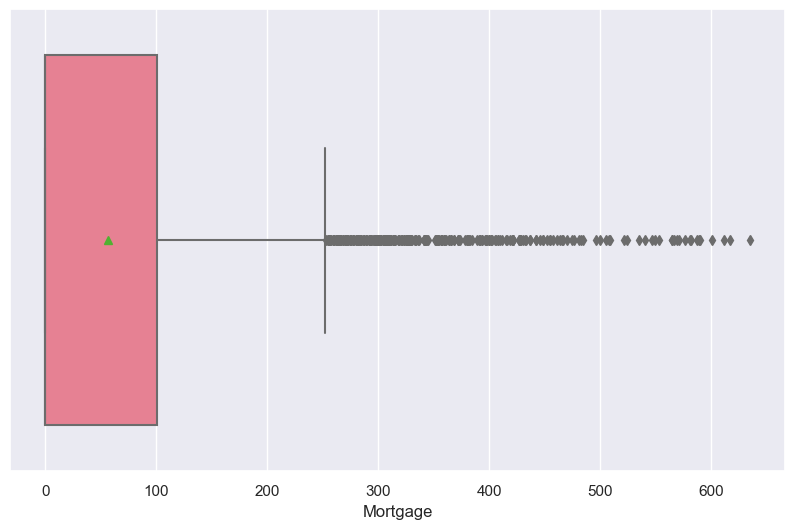

In [77]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Mortgage", hue="Personal_Loan", showmeans=True)
plt.show()

We can see that Mortgage is skewed towards 0 , no significant lower shikers seen on the boxplot. It is understandable that the customers with mortgage seem to have accepted the mreo personal loan on an average.

8. Personal Loan VS Securities Account

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


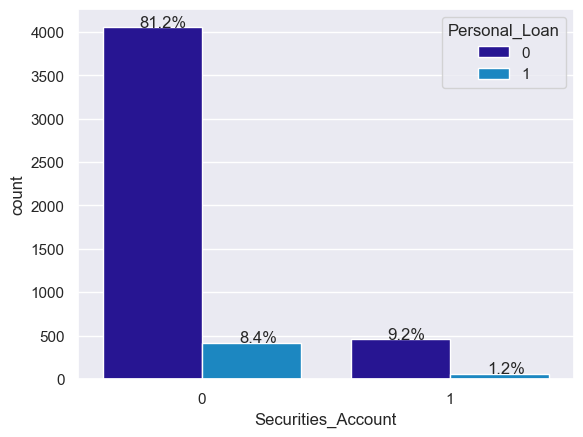

In [78]:
stacked_plot(df["Securities_Account"])
sns.set(palette="nipy_spectral")
ax = sns.countplot(data=df, x="Securities_Account", hue="Personal_Loan")
perc_on_bar(ax, df["Securities_Account"])

Around 90% of customer who have securities account are not accepting personal loan; however, only 10% of the customers are seem to accept the personal loan.

# 9. Personal Loan Vs CD Account

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


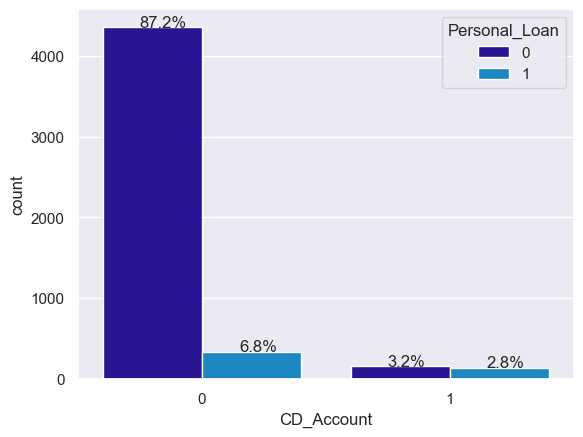

In [79]:
stacked_plot(df["CD_Account"])
ax = sns.countplot(data=df, x="CD_Account", hue="Personal_Loan")
perc_on_bar(ax, df["CD_Account"])

* There are only 140 customers were accepted the loan out of 480 customers.





# 10. PERSONAL LOAN VS ONLINE

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


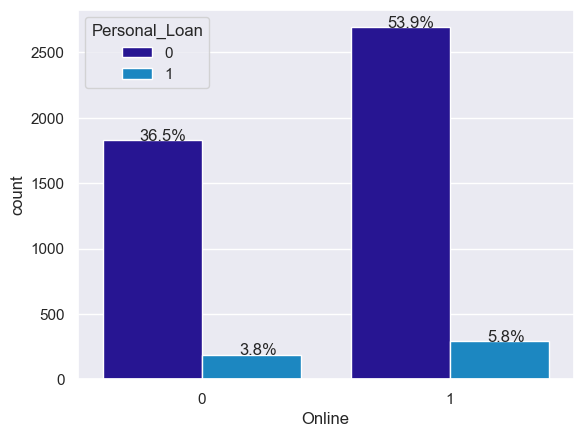

In [80]:
stacked_plot(df["Online"])
ax = sns.countplot(data=df, x="Online", hue="Personal_Loan")
perc_on_bar(ax, df["Online"])

1. Found that only 291 of the customers have accepted the personal loan out of 2984 customers who avail the internet banking facilities.

# 11. Personal Loan VS Credit Card

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


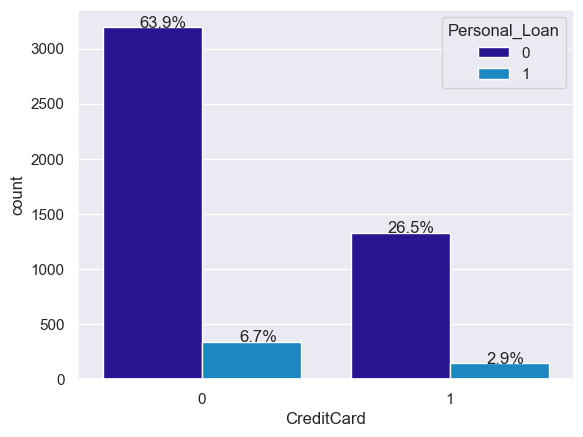

In [81]:
stacked_plot(df["CreditCard"])
ax = sns.countplot(data=df, x="CreditCard", hue="Personal_Loan")
perc_on_bar(ax, df["CreditCard"])

1. It is showing that 1470 customers who use a credit card issued by other bank,143 of them have a pesonal loan with AllLife Bank.

# 12. Personal Loan VS County

<Axes: xlabel='County'>

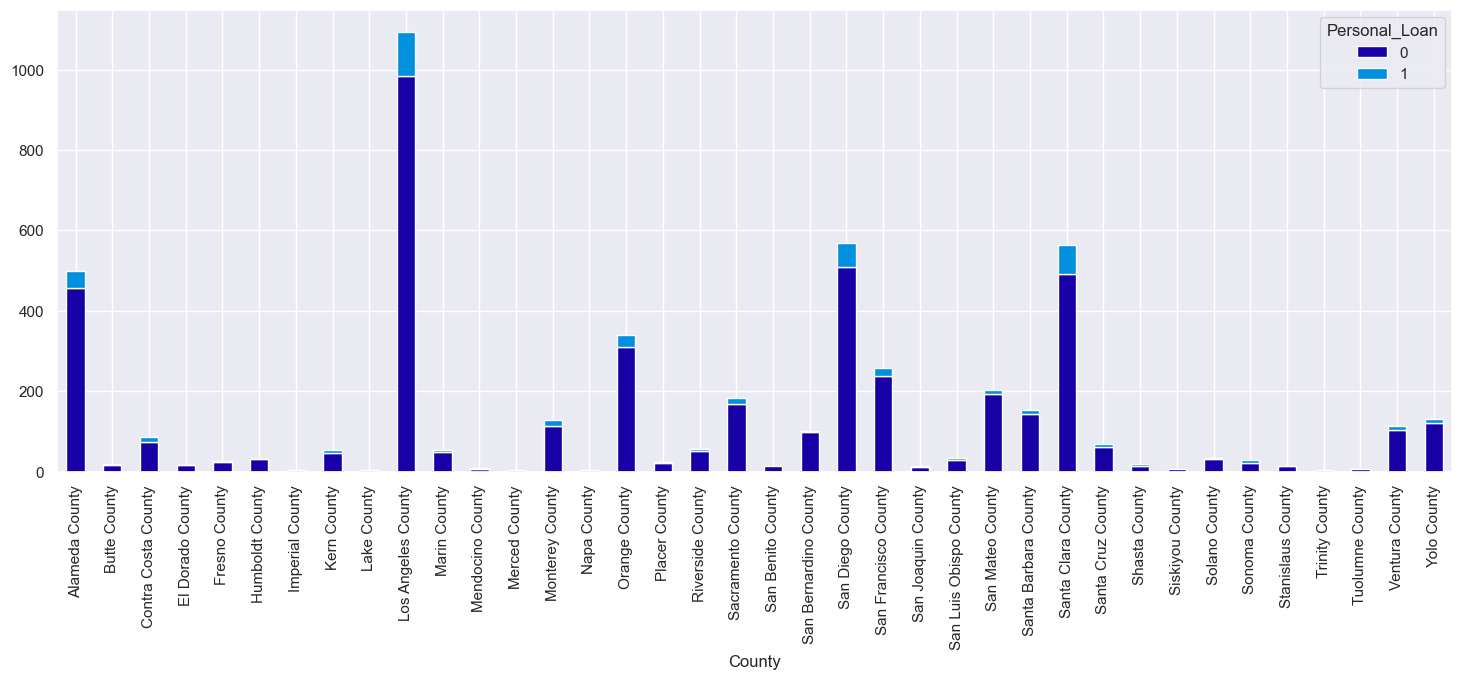

In [82]:
pd.crosstab(df["County"], df["Personal_Loan"]).plot(kind="bar", stacked=True, figsize=(18, 6))



*   It is remarkable that the Los Angeles County has the maximum number of customer who borrowed a personal loan.
*   Santa Clara and San Diego counties are leading in numbers after Los Angeles county.
*   Personal loan values for imperial county and Napa county need to be checked.   



# Multivariate Analysis

In [83]:
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County'],
      dtype='object')


<Figure size 1600x700 with 0 Axes>

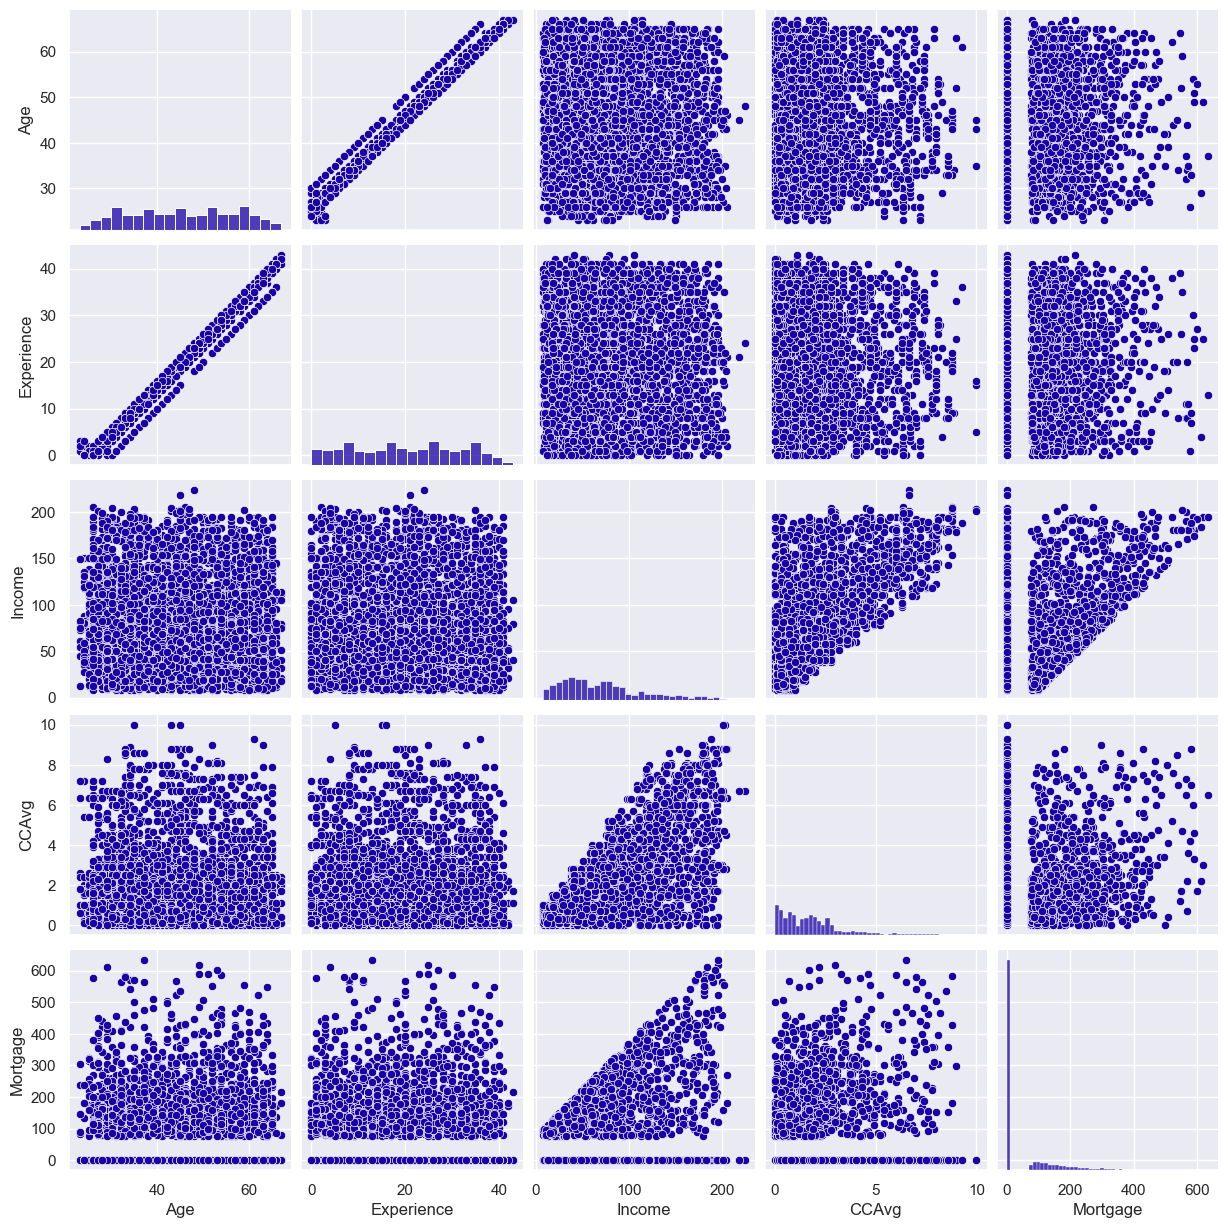

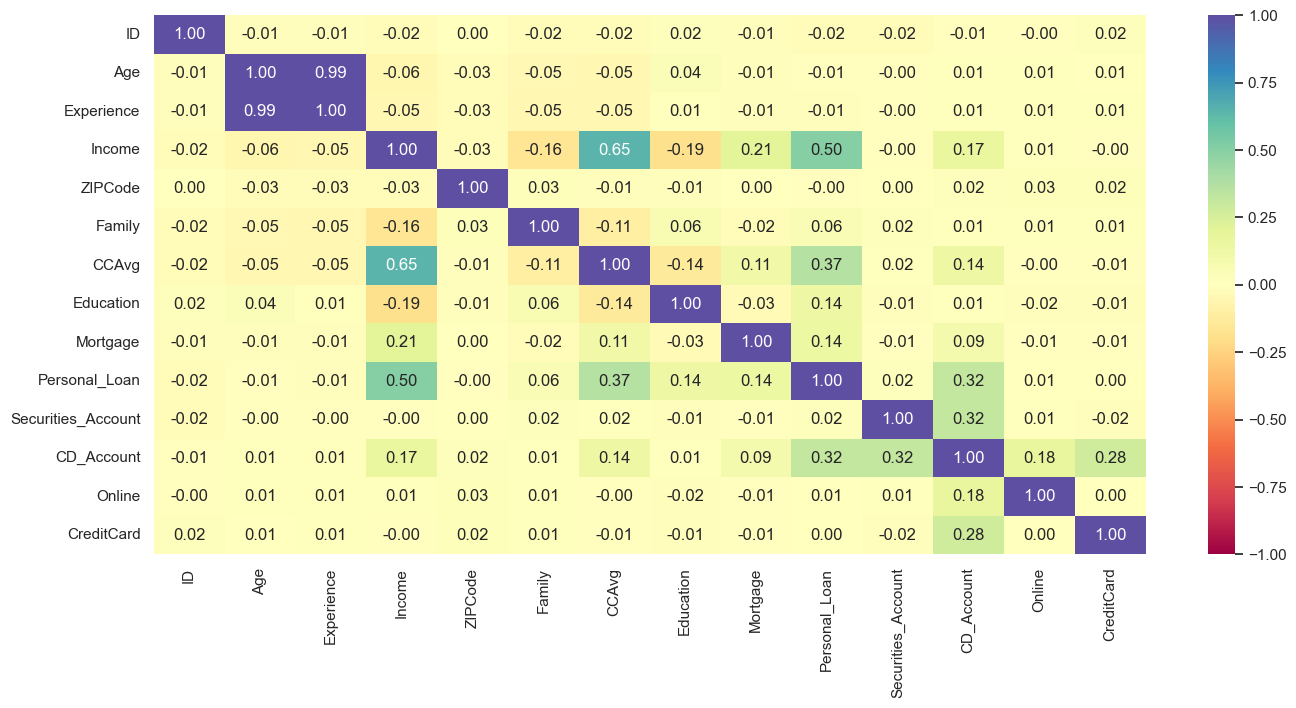

In [84]:
plt.figure(figsize=(16, 7))
#convert categorical data into numerical data
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
sns.pairplot(df[numerical_features])
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(16, 7))
# Generate heatmap using the numerical features
ax = sns.heatmap(numerical_df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="Spectral")
plt.show()




1. Found that age and experience have a very high correlation of 0.99
2. Income and CCAvg ahve a ositive correlation of 0.65
3. Personal loan and CD Account and securities account and CD Account have an equal number of correlation of 0.32.
4. Personal loan and CCAvg have a correlation of 0.37
5. Personal loan and income have the correlation of 0.50
6. The least correlation of 0.28 is showing between CD account and creditcard.

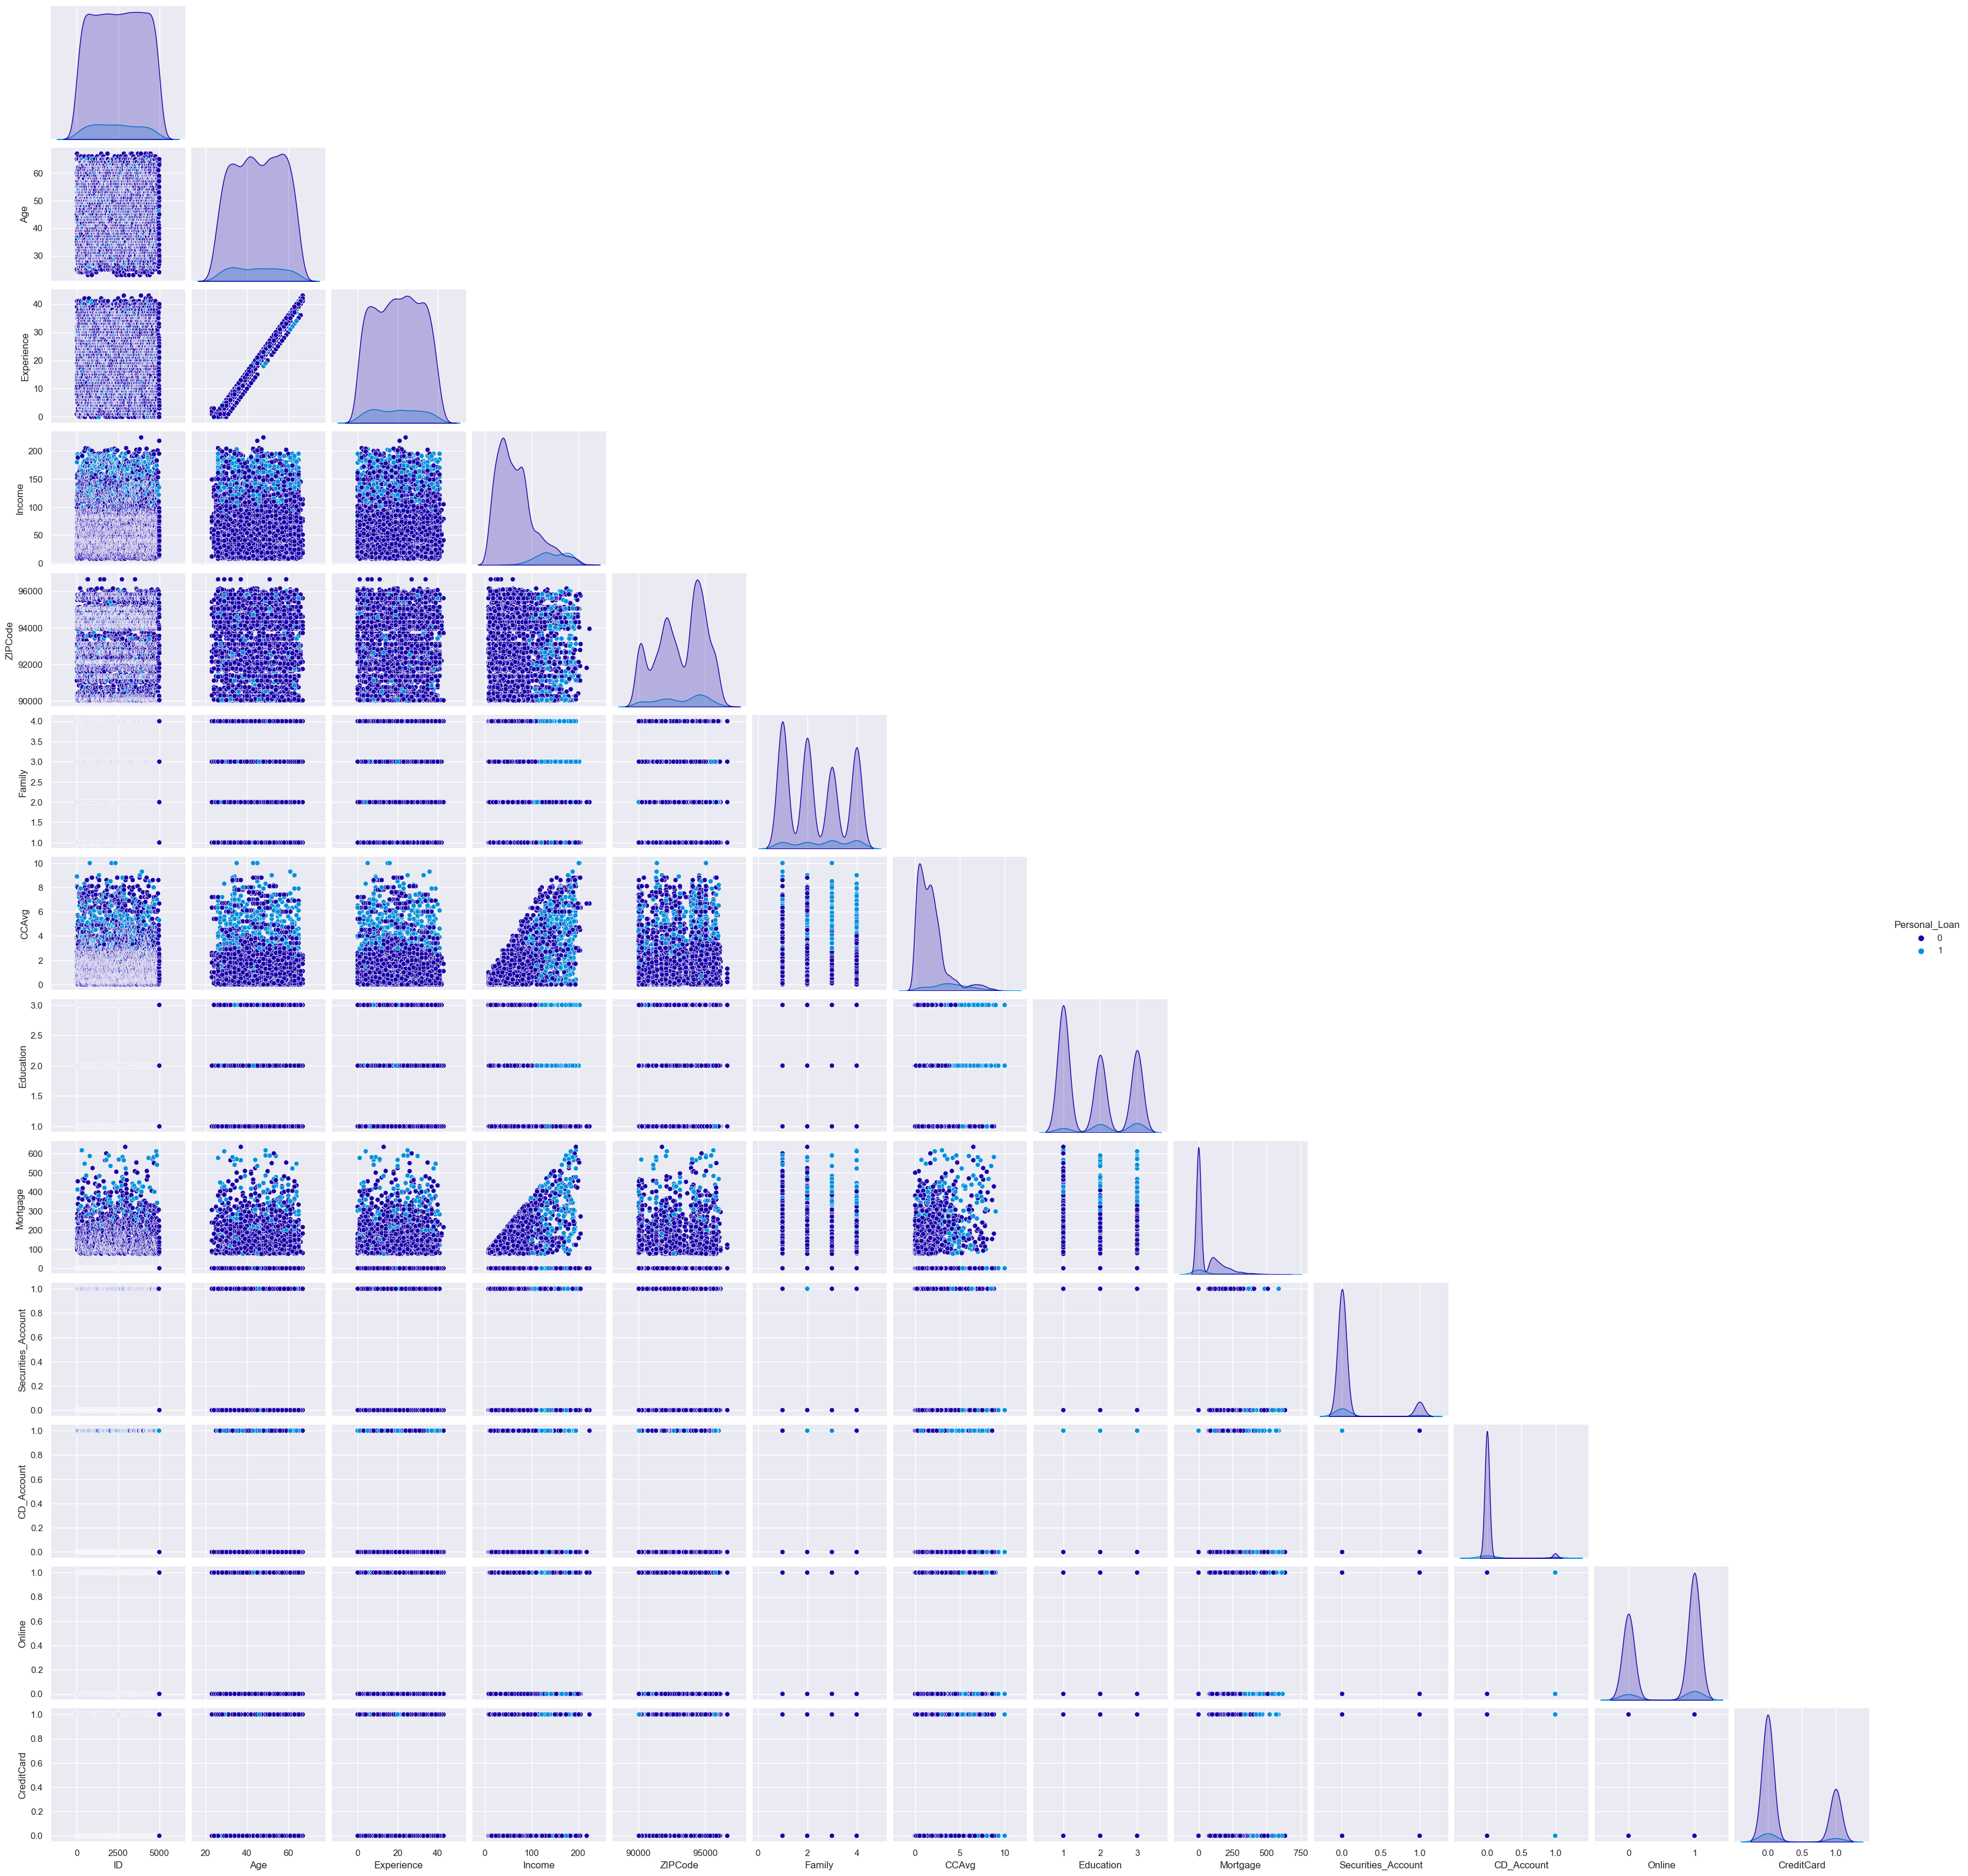

In [85]:
sns.pairplot(df, hue="Personal_Loan", corner = True)
plt.show()

1. It is clear that the customers with higher income, CCAvg and Mortgage has borrowed a personal loan.

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


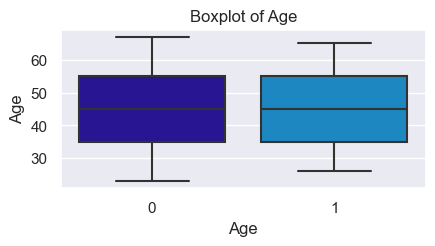

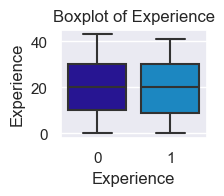

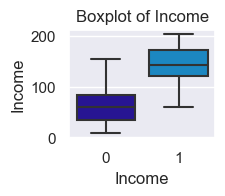

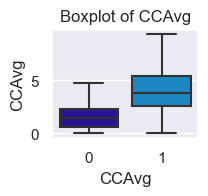

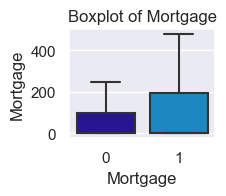

In [86]:
col1 = df[["Age", "Experience", "Income", "CCAvg", "Mortgage", "Personal_Loan"]].columns.to_list()
col1.remove("Personal_Loan")
print(col1)
plt.figure(figsize=(16, 7))

for i, variable in enumerate(col1):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x="Personal_Loan", y=variable, data=df, showfliers = False)
    plt.title(f'Boxplot of {variable}')
    plt.xlabel(variable)
    plt.show()

1. Based on these boxplots, it is prove that the observation from the pairplot seems correct.
2. Customers with higher income, CCAvg and Mortgage have borrowed personal loan.
3.  Age and Experience show similar distribution as expected as have high positive correlation.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [87]:
#Missing value treatment
df.isnull().sum()


ID                     0
Age                    0
Experience             0
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
County                34
dtype: int64

There is no missing value in this dataframe.

In [88]:
#checking feature engineering need in a data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  County              4966 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 586.1

The memory usage of this data is 586.1KB. It contains 5000 rows and 15 columns.

In [89]:
df["County"]. value_counts()

County
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou County              7
T

In [90]:
#Grouping counties under 40 observations into 'other county'
county = df["County"].value_counts().tail(20).keys()
df["County"] = np.where(df["County"].isin(county), "Other County", df["County"])


In [91]:
df["County"]. value_counts()

County
Los Angeles County       1095
San Diego County          568
Santa Clara County        563
Alameda County            500
Orange County             339
Other County              312
San Francisco County      257
San Mateo County          204
Sacramento County         184
Santa Barbara County      154
Yolo County               130
Monterey County           128
Ventura County            114
San Bernardino County     101
Contra Costa County        85
Santa Cruz County          68
Riverside County           56
Marin County               54
Kern County                54
Name: count, dtype: int64

In [92]:
df["Personal_Loan"].value_counts()

Personal_Loan
0    4520
1     480
Name: count, dtype: int64

In [93]:
df["Securities_Account"].value_counts()

Securities_Account
0    4478
1     522
Name: count, dtype: int64

In [94]:
df["CD_Account"].value_counts()

CD_Account
0    4698
1     302
Name: count, dtype: int64

In [95]:
df["Online"].value_counts()

Online
1    2984
0    2016
Name: count, dtype: int64

In [96]:
df["CreditCard"].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [97]:
df["Mortgage"].value_counts()

Mortgage
0      3462
98       17
119      16
89       16
91       16
103      16
83       16
102      15
90       15
78       15
87       14
94       14
131      14
118      14
104      14
101      14
144      13
106      13
81       13
116      13
109      13
112      13
97       12
120      12
100      12
76       12
185      12
121      12
84       11
137      11
79       11
115      11
153      11
95       11
86       11
111      11
158      11
184      11
113      10
108      10
142      10
117      10
82       10
151      10
161      10
135      10
148       9
149       9
166       9
88        9
221       9
146       9
123       9
167       9
128       9
159       9
138       8
205       8
147       8
174       8
218       8
122       8
75        8
140       8
170       8
194       8
110       8
114       8
169       8
157       8
164       8
105       8
207       8
132       8
96        7
127       7
124       7
229       7
204       7
230       7
85        7
249       7
219    

In [98]:
df.groupby("Personal_Loan")["Mortgage"].value_counts()

Personal_Loan  Mortgage
0              0           3150
               98            17
               83            16
               103           16
               89            16
               102           15
               91            15
               90            15
               119           15
               78            15
               131           14
               87            14
               104           14
               101           14
               94            13
               116           13
               112           13
               118           13
               109           13
               144           12
               100           12
               81            12
               185           12
               95            11
               121           11
               79            11
               76            11
               137           11
               153           11
               106           11
               9



1. Mortgage can be restructed as Yes/No for better analysis.
2. It is also evident that personal loan is '0' for all mortgage '0' values.
3. We have seen that mortgage is highly skewed towards '0'



In [99]:
#user defined function to convert mortgage to a boolean data
def mort(val):
    if val == 0:
        return "No"
    else:
        return "Yes"
Mortgage = df["Mortgage"].apply(mort)
Mortgage.value_counts()
df["Mortgage_Yes/No"] = df["Mortgage"].apply(mort)
df["Mortgage_Yes/No"].value_counts()



Mortgage_Yes/No
No     3462
Yes    1538
Name: count, dtype: int64

In [100]:
#Analyse the customer have mortgage to accept personal loan by yes or no
df.groupby("Mortgage_Yes/No")["Personal_Loan"].value_counts()


Mortgage_Yes/No  Personal_Loan
No               0                3150
                 1                 312
Yes              0                1370
                 1                 168
Name: count, dtype: int64

There are 480 customers have chance to take personal loan out of 5000 customers with the bank.

In [101]:
df_dtree = df.copy()
df_dtree.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

                 County Mortgage_Yes/No  
0    Los Angeles County              No  
1    Los Angeles County              No  
2        Alameda County              No  
3  San Francisco County              No  
4    Los Angeles County              No

# Outlier treatment

In [102]:
#creating a list of numerical columns
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

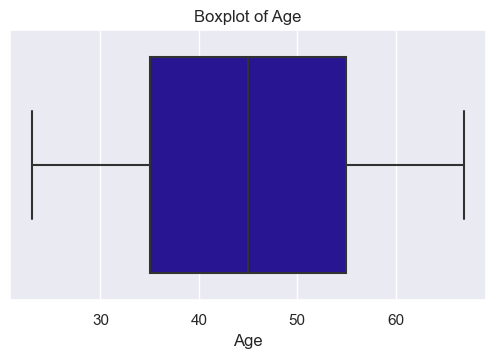

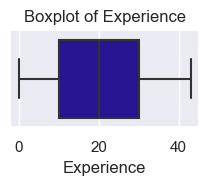

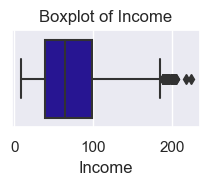

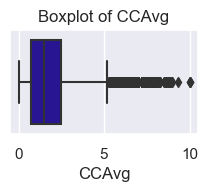

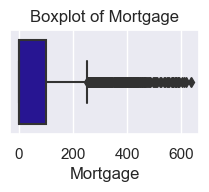

In [103]:
#Boxplots of numerical columns to view the outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()




*   The outliers are present in income,CCAvg and mortgage.



In [104]:
#Creating a list of numerical columns
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
# User defined function to floor and cap the outliers



def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """

    Q1 = df[col].quantile(0.25)  # 1st quantile
    Q3 = df[col].quantile(0.75)  # 3rd quantile
    IQR = Q3 - Q1
    Lower_whisker = Q1 - 1.5 * IQR
    Upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker

    df[col] = np.clip(df[col], Lower_whisker, Upper_whisker)

    return df
def treat_outliers_all(df, col_list):

  """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
  #The for loop had an extra level of indentation. Removed it to align with function definition
  for c in col_list:
        df = treat_outliers(df, c)
  return df

#ensure 'Mortgage' is numeric, if it contains 'Yes'/'No', convert them to 1/0
df['Mortgage'] = df['Mortgage'].map({'Yes': 1, 'No': 0}).astype(float)


In [105]:
#Treating the outliers
df = treat_outliers_all(df, numerical_features)

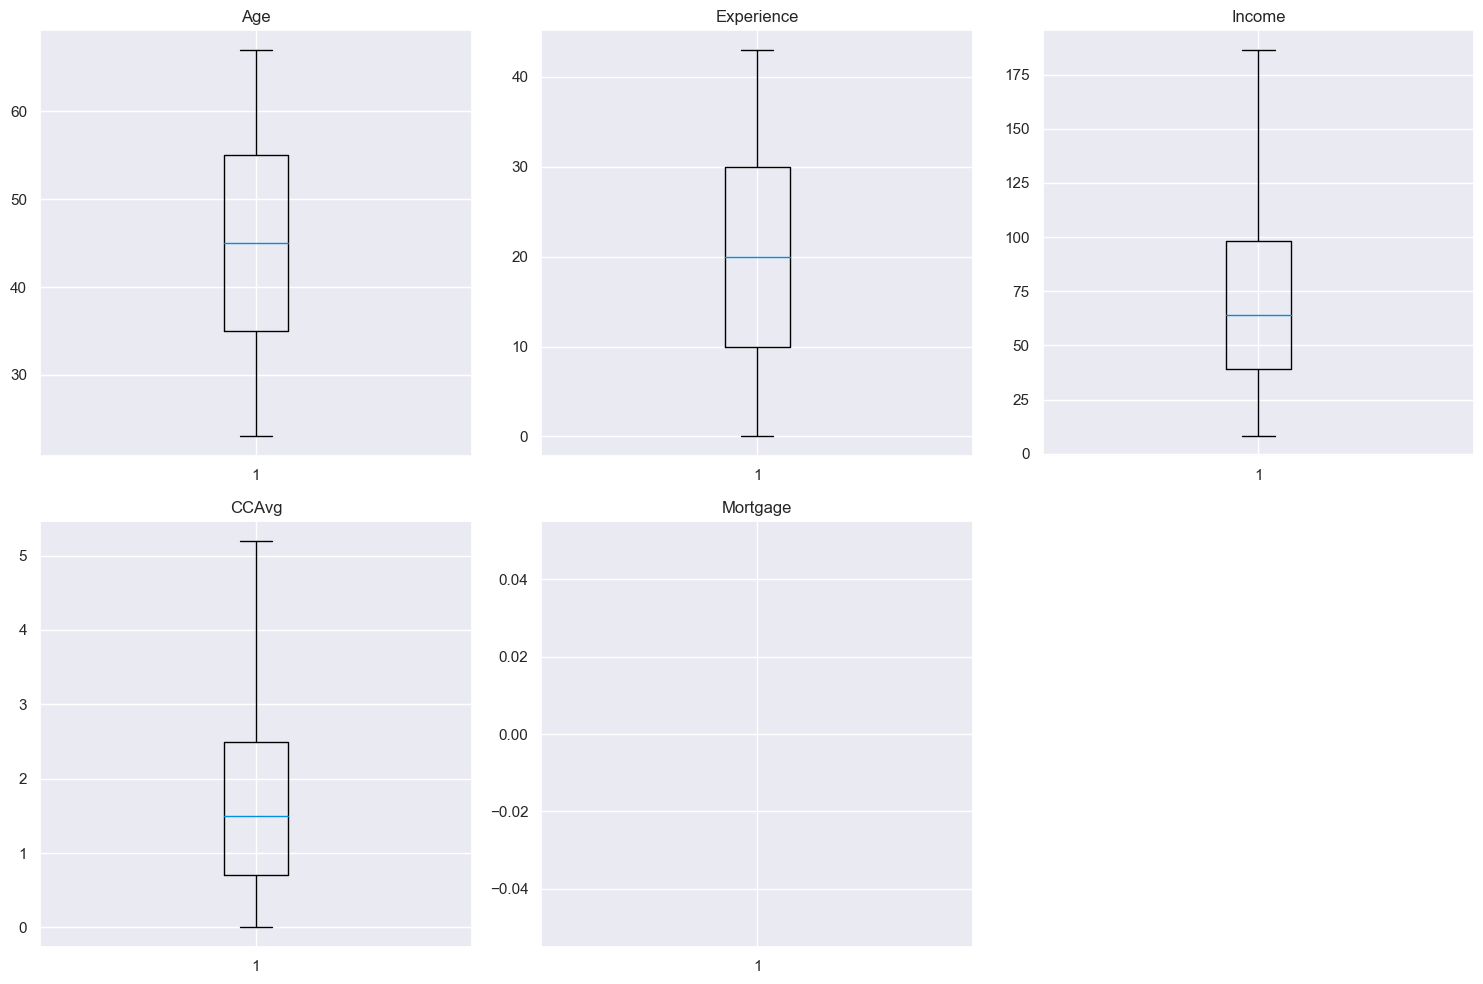

In [106]:
#Plotting the boxplot to check if the outliers are fixed

plt.figure(figsize=(15, 10))


for i, variable in enumerate(col1):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There is no outliers are present; it has been fixed now.  

In [107]:
#Categorizing datatypes

df["County"] = df["County"].astype("category")
df["Mortgage_Yes/No"] = df["Mortgage_Yes/No"].astype("category")
df["Education"] = df["Education"].astype("category")

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   float64 
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            0 non-null      float64 
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
 14  County              4966 non-null   category
 15  Mortgage_Yes/No     5000 non-null   ca

* The data processing has been done.
* Next procedure is to drop the unwanted columns before proceeding with model building

In [109]:
#dropping unwanted columns
df.drop(['ZIPCode', 'Mortgage'], axis = 1, inplace=True)

In [110]:
#Final dataset
df.head()

ID  Age  Experience  Income  Family  CCAvg Education  Personal_Loan  \
0   1   25           1    49.0       4    1.6         1              0   
1   2   45          19    34.0       3    1.5         1              0   
2   3   39          15    11.0       1    1.0         1              0   
3   4   35           9   100.0       1    2.7         2              0   
4   5   35           8    45.0       4    1.0         2              0   

   Securities_Account  CD_Account  Online  CreditCard                County  \
0                   1           0       0           0    Los Angeles County   
1                   1           0       0           0    Los Angeles County   
2                   0           0       0           0        Alameda County   
3                   0           0       0           0  San Francisco County   
4                   0           0       0           1    Los Angeles County   

  Mortgage_Yes/No  
0              No  
1              No  
2              No  
3              No  
4              No

In [111]:
#Making a copy of the data for logistic regression model building
df_log = df.copy()

**Key insights from EDA**

The results shows from the EDA are maximum number of customers who opted for a personal loan are the following:
*They are between the ages of 35 and 55.
* Have a minimum experience of 9 years.
* Have a minimum annual average income above 120000 dollars.
* Have a fsmily size of 3+.
* They own a CD account with the bank
* Have an education level of two and above.
* Spend an average of $25K on creditcards every month
* They do have a mortgage.
* Avail online banking facilities
* These customers are from the Los Angeles,San Diego or Santa clara counties.

## Model Building

Model Building - Logistic Regression

In [112]:
# defining the independent variable
X = df.drop(columns=['ID', 'Personal_Loan'])

df_log.head()

ID  Age  Experience  Income  Family  CCAvg Education  Personal_Loan  \
0   1   25           1    49.0       4    1.6         1              0   
1   2   45          19    34.0       3    1.5         1              0   
2   3   39          15    11.0       1    1.0         1              0   
3   4   35           9   100.0       1    2.7         2              0   
4   5   35           8    45.0       4    1.0         2              0   

   Securities_Account  CD_Account  Online  CreditCard                County  \
0                   1           0       0           0    Los Angeles County   
1                   1           0       0           0    Los Angeles County   
2                   0           0       0           0        Alameda County   
3                   0           0       0           0  San Francisco County   
4                   0           0       0           1    Los Angeles County   

  Mortgage_Yes/No  
0              No  
1              No  
2              No  
3              No  
4              No

This data shows that the ages between 25-45 are more likely to take personal loan.

In [113]:
def perc_on_bar(ax, df):
    """

       drop the unwanted columns before
       proceed with model building
    """

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()

X = df.drop(columns=['ID', 'Personal_Loan'])
y = df['Personal_Loan']


In [114]:
# fitting the model to the training data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 

#Creating dummy variable for categorical features
X = pd.get_dummies(X, drop_first=True)

#convert categorical data into numerical data
X=pd.get_dummies(X, columns=X.filter(items=["Age", "Experience", "Income", "CC_Avg", "Zipcode", "Family", "Mortgage", "Education"]).columns.tolist(), drop_first=True)
X.head()

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(f"Percentage of clases in training set : {y_train.value_counts(normalize=True)}")
print(f"Percentage of clases in test set :{y_test.value_counts(normalize=True)}")

(3500, 260)
(1500, 260)
(3500,)
(1500,)
Percentage of clases in training set : Personal_Loan
0    0.907714
1    0.092286
Name: proportion, dtype: float64
Percentage of clases in test set :Personal_Loan
0    0.895333
1    0.104667
Name: proportion, dtype: float64


In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [117]:
print(f"KNN Score {knn.score(X_test, y_test)}")

KNN Score 0.8973333333333333


We have a well balanced classes of the dependant variable in both train and test sets.

In [118]:
#Creating training and test sets
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
df_log.head()
X = df.drop(columns=['ID', 'Personal_Loan'])
y = df['Personal_Loan']

#creating dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Evaluation Criterion

* *** Model can make wrong prediction such as***:
      1. Predicting a customer will not borrow the personal loan but in reality the customer will borrow the loan.
      2. Predicting a customer will  borrow the personal loan but in reality the customer will not borrow the loan.
The concerning prediction is the first prediction. AllLife Bank is looking to expand its loan business, every single customer who will borrow the personal loan is very important. Therefore, the mistakes in the first prediction has to be considerably low.

**How to resolve false Negatives?**
We can maximized the *Recall score* inorder to resolve false negatives.  greater the *Recall score* higher the chances of predicting the potential customers who will borrow the personal loan.

### Model Building

In [119]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [120]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape((2, 2))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Logistic Regression with sklearn library

In [121]:
#Using the newtown-cg solver as it is faster for high-dimential data

import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(solver='newton-cg')
lg.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

Model performance on trainig set

In [122]:
#Predicting on training set
y_pred_train = lg.predict(X_train)


Training set performance:

   Accuracy    Recall  Precision        F1
0  0.961429  0.668731   0.885246  0.761905
None
Recall:  0.6687306501547987
Accuracy:  0.9614285714285714
Precision:  0.8852459016393442
F1:  0.7619047619047619


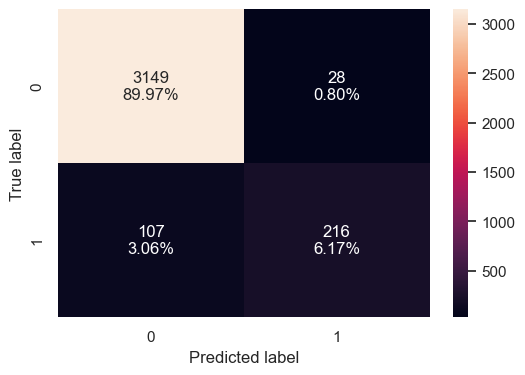

In [123]:
print("Training set performance:\n")
print(model_performance_classification(lg, X_train, y_train))
print(confusion_matrix_sklearn(lg, X_train, y_train))
print("Recall: ", recall_score(y_train, y_pred_train))
print("Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Precision: ", precision_score(y_train, y_pred_train))
print("F1: ", f1_score(y_train, y_pred_train))

Model performance on test set

In [124]:
#Predicting on the test set
y_pred_test = lg.predict(X_test)

Test set performance:

   Accuracy    Recall  Precision        F1
0  0.959333  0.694268   0.893443  0.781362
None
Recall:  0.6942675159235668
Accuracy:  0.9593333333333334
Precision:  0.8934426229508197
F1:  0.7813620071684586


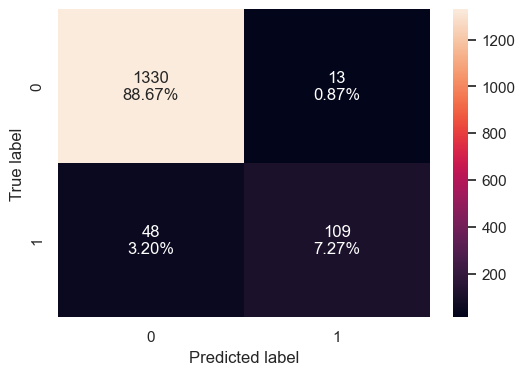

In [125]:
print("Test set performance:\n")
print(model_performance_classification(lg, X_test, y_test))
print(confusion_matrix_sklearn(lg, X_test, y_test))
print("Recall: ", recall_score(y_test, y_pred_test))
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision: ", precision_score(y_test, y_pred_test))
print("F1: ", f1_score(y_test, y_pred_test))

Observations


1.  The training and testing recall scores are 0.616 and 0.62; same scores.
2.   The metric scores are looking good
3. however,for checking the statstical validity of the model, we must buid a model using the statsmodels library
4. Accuracy in the test model is only 1% lower than the training model.



Logistic Regression with statsmodels library

In [126]:
# Importing necessary libraries
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split


# Assuming 'df' is your original DataFrame containing the data
# If it's named something else, replace 'df' with the actual name
df_logit = df.copy()  # Creating a copy of the original DataFrame and assigning it to df_logit

logistic_regression = sm.Logit(y_train, X_train.astype(float))
X = df_logit.drop("Personal_Loan", axis=1)
y = df_logit["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [127]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.model_selection import train_test_split

def logistic_regression(X, y):
    # Ensure all columns in X are numeric
    X = X.select_dtypes(include=['number'])  # Select only numeric columns

    # sm.Logit expects y to be a 1D array, not a Series
    y = y.values

    logistic_regression_model = sm.Logit(y, X)
    result = logistic_regression_model.fit()
    return result

# Assuming X and y are your original DataFrames

# Convert categorical columns in X to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Add a constant to the independent variables
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Now call  logistic regression function
result = logistic_regression(X_train, y_train)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.153260
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3989
Method:                           MLE   Df Model:                           10
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.5074
Time:                        03:48:39   Log-Likelihood:                -613.04
converged:                       True   LL-Null:                       -1244.5
Covariance Type:            nonrobust   LLR p-value:                3.777e-265
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -14.5433      1.665     -8.735      0.000     -17.807     -11.280
ID   

In [128]:
#Fitting logistic regression model
logistic_regression = sm.Logit(y_train, X_train.astype(float))
logit = sm.Logit(y_train, X_train.astype(float))
result = logit.fit()
lg = logistic_regression.fit(disp=False)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.111673
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3968
Method:                           MLE   Df Model:                           31
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.6411
Time:                        03:48:39   Log-Likelihood:                -446.69
converged:                       True   LL-Null:                       -1244.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -13.6318      2.006     -6.795      0.00

In [129]:
#Fitting logistic regresaion model
logistic_regression = sm.Logit(y_train, X_train.astype(float))
logit = sm.Logit(y_train, X_train.astype(float))
result = logit.fit()
lg = logistic_regression.fit(disp=False)
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.111673
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3968
Method:                           MLE   Df Model:                           31
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.6411
Time:                        03:48:40   Log-Likelihood:                -446.69
converged:                       True   LL-Null:                       -1244.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -13.6318      2.006     -6.795      0.00

**Observations**

In this dataset, negative coefficient values indicate that as the corresponding attribute values increase, the probability of borrowing a personal loan decreases. Conversely, positive coefficients suggest that an increase in attribute values leads to a higher probability of borrowing. It is essential to address multicollinearity to obtain reliable coefficients and p-values. The p-value measures the significance of variables, with values below 0.05 indicating a statistically significant relationship that meets the 0.05 significance threshold.

# Test for Multicollinearity - variation inflation factor

In [130]:
# Convert all columns in X_train to numeric if possible
# If a column cannot be converted, it will be filled with NaN
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')

# Drop columns with any non-finite values (NaNs, infinities)
# This is crucial to ensure all data is numeric and finite
X_train_numeric = X_train_numeric.dropna(axis=1)
# Reset index after dropping columns for consistency
X_train_numeric = X_train_numeric.reset_index(drop=True)
# Select only numerical features
numerical_features = X_train_numeric.select_dtypes(include=np.number).columns
X_train_numeric = X_train_numeric[numerical_features]

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])],
    index=X_train_numeric.columns,
    dtype=float,
).sort_values(ascending=False)

print("Series after feature selection : \n\n{}\n".format(vif_series))

Series after feature selection : 

const                 430.718854
Experience             84.025630
Age                    84.014394
Income                  1.730695
CCAvg                   1.678966
CD_Account              1.315408
Securities_Account      1.141514
CreditCard              1.103493
Online                  1.040916
Family                  1.037815
ID                      1.002103
dtype: float64



The VIF score of both age and experience are same. This is indicating that these variables are collinear.  

# Removing Multicollinearity

In [131]:
#removing age
# Create a copy of X_train to avoid modifying the original DataFrame
X_train1 = X_train.copy()

#check if 'Age' column exists before dropping
if 'Age' in X_train1.columns:
# Drop the 'Age' column from the copy

    X_train1 = X_train.drop("Age", axis=1)
else:
    print("'Age' column not found in X_train1.")

# Apply the same numeric preprocessing to X_train1 as you did for X_train
# Convert all columns in X_train1 to numeric if possible
X_train_numeric = X_train1.apply(pd.to_numeric, errors='coerce')

# Drop columns with any non-finite values (NaNs, infinities)
X_train_numeric = X_train_numeric.dropna(axis=1)
X_train_numeric = X_train_numeric.reset_index(drop=True)

# Select only numerical features
numerical_features = X_train_numeric.select_dtypes(include=np.number).columns
X_train_numeric = X_train_numeric[numerical_features]


# Calculate VIF for the modified DataFrames
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series_1 = pd.Series(
    [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])],
    index=X_train_numeric.columns,
    dtype=float,
).sort_values(ascending=False)

print("Series after feature selection : \n\n{}\n".format(vif_series_1)) # Print vif_series_1 here

Series after feature selection : 

const                 19.185836
Income                 1.716648
CCAvg                  1.674711
CD_Account             1.315334
Securities_Account     1.141512
CreditCard             1.103211
Online                 1.040914
Family                 1.036837
Experience             1.007605
ID                     1.002051
dtype: float64



Now, we can proceed with model building since all the variables have vif<5.

In [132]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
logistic_regression_1 = sm.Logit(y_train, X_train.astype(float))
lg1 = logistic_regression_1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3968
Method:                           MLE   Df Model:                           31
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.6411
Time:                        03:48:40   Log-Likelihood:                -446.69
converged:                       True   LL-Null:                       -1244.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -13.6318      2.006     -6.795      0.000     -17.564      -9.700
ID                           -6.769e-05   6.27e-05     -1.079      0.281     

***Removing variables with P-value>0.05***

In [133]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your original DataFrame
X_train2 = X_train.copy() # Create a copy of X_train and assign it to X_train2

# Replace infinite values with NaN
X_train2 = X_train2.replace([np.inf, -np.inf], np.nan)



In [134]:
#Removing Experience
X_train2 = X_train2.drop("Experience", axis=1).replace([np.inf, -np.inf], np.nan)
# Drop rows with any missing values
X_train2 = X_train2.dropna()
# Ensure y_train has the same index as X_train2 after dropping rows
y_train2 = y_train[y_train.index.isin(X_train2.index)]


logistic_regression_2 = sm.Logit(y_train, X_train.astype(float))
lg2 = logistic_regression_1.fit(disp=False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3968
Method:                           MLE   Df Model:                           31
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.6411
Time:                        03:48:40   Log-Likelihood:                -446.69
converged:                       True   LL-Null:                       -1244.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -13.6318      2.006     -6.795      0.000     -17.564      -9.700
ID                           -6.769e-05   6.27e-05     -1.079      0.281     

In [135]:
import statsmodels.api as sm

# Initial list of columns
cols = X_train2.columns.tolist()

# Set an initial max p-value
max_p_value = 1

# Loop to drop features with high p-values
while len(cols) > 0:
    # Define the training set with the current columns
    X_train_aux = X_train2[cols]
    X_train_aux = sm.add_constant(X_train_aux)  # Add constant for intercept

    # Fit the logistic regression model
    model = sm.Logit(y_train2, X_train_aux.astype(float)).fit(disp=False)

    # Get p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    # Check if max p-value is greater than 0.05
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)  # Drop the feature
    else:
        break  # Exit loop if all features are significant

# Selected features after dropping
selected_features = cols
print(selected_features)

['const', 'Income', 'Family', 'CCAvg', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_2', 'Education_3', 'County_San Mateo County']


In [136]:
X_train3 = X_train2[selected_features]

logistic_regressin_3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logistic_regressin_3.fit()

print(lg3.summary())

Optimization terminated successfully.
         Current function value: 0.113747
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3989
Method:                           MLE   Df Model:                           10
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.6344
Time:                        03:48:40   Log-Likelihood:                -454.99
converged:                       True   LL-Null:                       -1244.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -13.5391      0.672    -20.144      0.000     -14.856   

# Observations
1. No feature now have a p-value greater than 0.5.therefore,the features in X_train3 can be considered as the final ones and lg3 as the final model.

2. The coefficients of all the selected features are positive. Therefore, an increase in these will lead to an increase in the probability of a customer accepting the personal loan.

# Converting coefficients to odds

In [137]:
#converting coeffficients to odds as they are in terms of log(odd)
odds = np.exp(lg3.params)
odds

#finding the percentage change
percentage_change = odds * 100 - 100
percentage_change

#adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": percentage_change}, index=X_train3.columns).T

const    Income      Family      CCAvg  Securities_Account  \
Odds          0.000001  1.062851    2.028157   1.422737            0.425946   
Change_odd% -99.999868  6.285052  102.815750  42.273701          -57.405445   

              CD_Account     Online  CreditCard  Education_2  Education_3  \
Odds           51.127910   0.460703    0.290704    45.544678    50.263304   
Change_odd%  5012.791026 -53.929715  -70.929572  4454.467760  4926.330357   

             County_San Mateo County  
Odds                        0.201633  
Change_odd%               -79.836729

# Coefficient interpretations
* Features such as income,fanily,cc_avg, CD_account, Riversie county will increase the chance of taking personal loan
* Features such as securities_account,online,creditcard,San Mateo county will decrease the chance to  take personal loan.

## Model Performance Improvement

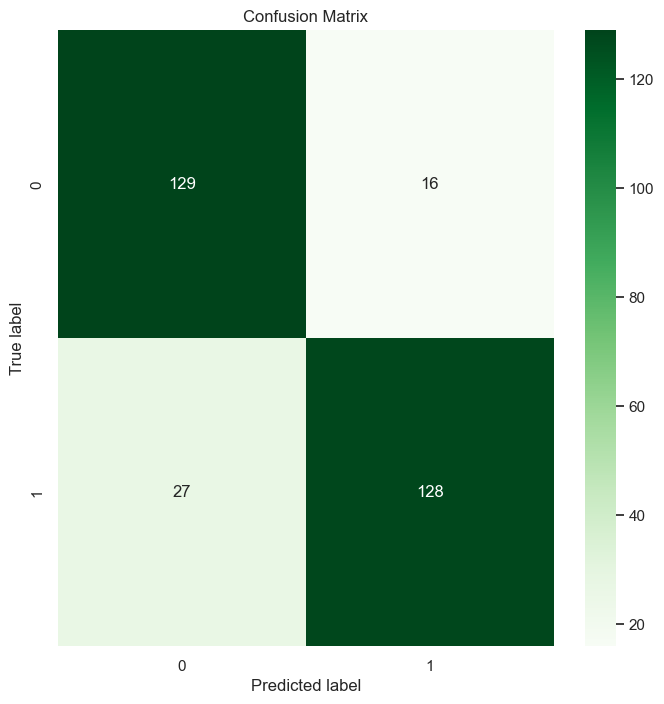

In [138]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Synthetic Dataset
X, y = make_classification(n_samples=1000, n_features=20,
                           n_classes=2, random_state=42)

# Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the Test Data
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [139]:
log_reg_model_train_perf = model_performance_classification(
    lg3, X_train3, y_train
)

print("Training performance :")
log_reg_model_train_perf

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [13]:
#Model  performance on test set
log_reg_model_test_perf = model_performance_classification(
    lg3, X_test, y_test
)

print("Test performance :")
log_reg_model_test_perf
X_test3 = X_test[list(selected_features)]
y_pred_test = lg3.predict(X_test3)


NameError: name 'lg3' is not defined

In [306]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)
confusion_matrix_statsmodels(lg3, X_test3, y_test)

NameError: name 'confusion_matrix_statsmodels' is not defined

In [310]:
logistic_regression_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance :")
log_reg_model_test_perf

NameError: name 'model_performance_classification_statsmodels' is not defined

In [ ]:
logistic_regression_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance :")
log_reg_model_train_perf


In [311]:
logitistic_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area= %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

NameError: name 'roc_auc_score' is not defined

Model performance improved by determining the optimal threshold using the AUD-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)


Model performance on training set

In [ ]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train)
confusion_matrix_statsmodels(lg3, X_train3, y_train)


In [ ]:
#checking model performance for this model
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance :")
log_reg_model_train_perf

**Observations**
1. recall of model has increased but the other metric have reduced.
2. The model is still performing well.

In [ ]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [ ]:
logistic_regression_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)

print("Test performance :")
log_reg_model_test_perf_threshold_auc_roc

Using Precision-Recall curve to find to better threshold
[italicized text]

In [14]:
y_scores = lg3.predict(X_train3)
precision, recall, thresholds = precision_recall_curve(y_train, y_scores)

  def. plot_precision_recall_vs
  plt.plot(thresholds, precision[:-1], "b--", label="Precision")
  plt.plot(thresholds, recall[:-1], "g-", label="Recall")

  ][link text](https://)
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])

  plt.show()

IndentationError: unexpected indent (3435417685.py, line 4)

At threshold 0.33 we get a balanced recall and precision

In [ ]:
# setting the threshold

optimal_idx = np.argmax(precision + recall - 1)
optimal_threshold_precision_recall = thresholds[optimal_idx]
print(optimal_threshold_precision_recall)


Model performance on training set

In [ ]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train)
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [312]:
logistic_regression_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_precision_recall
)

print("Training performance :")
log_reg_model_train_perf

NameError: name 'model_performance_classification_statsmodels' is not defined

Model performance on test set

In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [ ]:
logistic_regression_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_precision_recall
)

print("Test performance :")
log_reg_model_test_perf_threshold_curve


Logistic Regression Model Performance SUu

In [ ]:
#Training performance comparison
models_train_comparison_df = pd.concat(
    [
        log_reg_model_train_perf,
        logistic_regression_model_train_perf_threshold_auc_roc,
        logistic_regression_model_train_perf_threshold_curve,
    ],
    axis=1,
)
)
models_train_comparison_df.columns = ["AUC-ROC", "Precision-Recall"]
models_train_comparison_df

print("Training performance :")
models_train_comparison_df


In [12]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Logistic Regression Sklearn",
    "Logistic Regression-0.079 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Test performance comparison : ")

NameError: name 'pd' is not defined

# **conclusion**
1. The values are comparable across all three logistic regression models

## Model Building - decision Tree

In [142]:
#Viewing the dataset data_dtree that was created prior to the outlier treatment

df_dtree.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

                 County Mortgage_Yes/No  
0    Los Angeles County              No  
1    Los Angeles County              No  
2        Alameda County              No  
3  San Francisco County              No  
4    Los Angeles County              No

In [143]:
X = df_dtree.drop("Personal Loan","ZipCode", axis=1)
y = df_dtree["Personal Loan"]
#Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data_dtree.drop("Personal Loan", axis=1),
    data_dtree["Personal Loan"],
    test_size=0.20,
    random_state=42,
)

#creating dummy variables for categorical features
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)



TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("\n Percentage of classes in training set : ")
print(y_train.value_counts(normalize=True))
print("\n Percentage of classes in test set : ")
print(y_test.value_counts(normalize=True))

We have well balanced classes of thh depedent variable in both train and test sets.

# Model evaluation criterion
Model can make wrong prediction as :
Predicting a customer will borrow the personal loan but in reality the customer does not borrow.
Predicting a customer will not borrow the personal loan but in reality the customer will borrow the laon.

Prediction of concern :
The second prediction is our major concern as the AllLife Bank is looking to expand it's loan business, every single customer who will borrow the personal loan is very important. Hence, mistakes in the second prediction (i.e. False Negatives) has to be considerably low
How to reduce False Negatives? By recalling score should be maximized. Greater the Recall score higher the chances of predicting the potential customers who will borrow a personal loan

In [315]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [147]:
df_dtree.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

                 County Mortgage_Yes/No  
0    Los Angeles County              No  
1    Los Angeles County              No  
2        Alameda County              No  
3  San Francisco County              No  
4    Los Angeles County              No

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# X = df_dtree.drop("Personal Loan", axis=1)
# y = df_dtree["Personal Loan"]

X = df.drop(columns=['ID', 'Personal_Loan', 'ZIPCode'])
y = df['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=42
)

 # defining higher weightage to 1 in the dependent variable

KeyError: "['ZIPCode'] not found in axis"

In [152]:
# Fitting the model on the training set

model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Los Angeles County'

Model Performance on training set

In [151]:
confusion_matrix(y_train, model.predict(X_train))
import statsmodels.api as sm
confusion_matrix_sklearn(model, X_train, y_train)



NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [320]:
decision_tree_perf_train = model_performance_classification(model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

**Observation**
The deicison tree is fully grown.Tehrefore the model is overfit and it is able to classify all the data poits on the training set with no errors.

MOdel Performance on test set

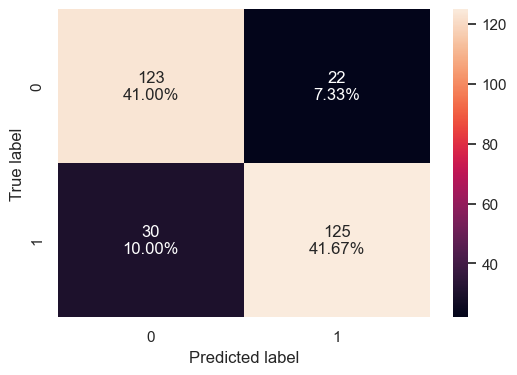

In [330]:
confusion_matrix_sklearn(model, X_test, y_test)
#confusion_matrix_statsmodels(model, X_test, y_test)


In [322]:
decision_tree_performance_test = model_performance_classification(model, X_test, y_test) # Replace y_est with y_test
decision_tree_performance_test

Accuracy    Recall  Precision        F1
0  0.826667  0.806452    0.85034  0.827815

Found disparity in model performance is due to overfitting

In [345]:
plt.figure(figsize=(12, 8))

# Assuming X_train is a pandas DataFrame containing your training data
# and you want to use its column names as feature names
feature_names = X_train.columns  # Define feature_names here

out = tree.plot_tree(
    model,
    feature_names=feature_names,  # Now feature_names is defined
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)


# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Text report showing the rules of a decision tree

print(tree.export_text(model, feature_names=feature_names, show_weights=True))


The tree above is fully grown hence,complex and difficult to interpret.

In [ ]:
#Gini importance of features in the tree building

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

NameError: name 'feature_names' is not defined

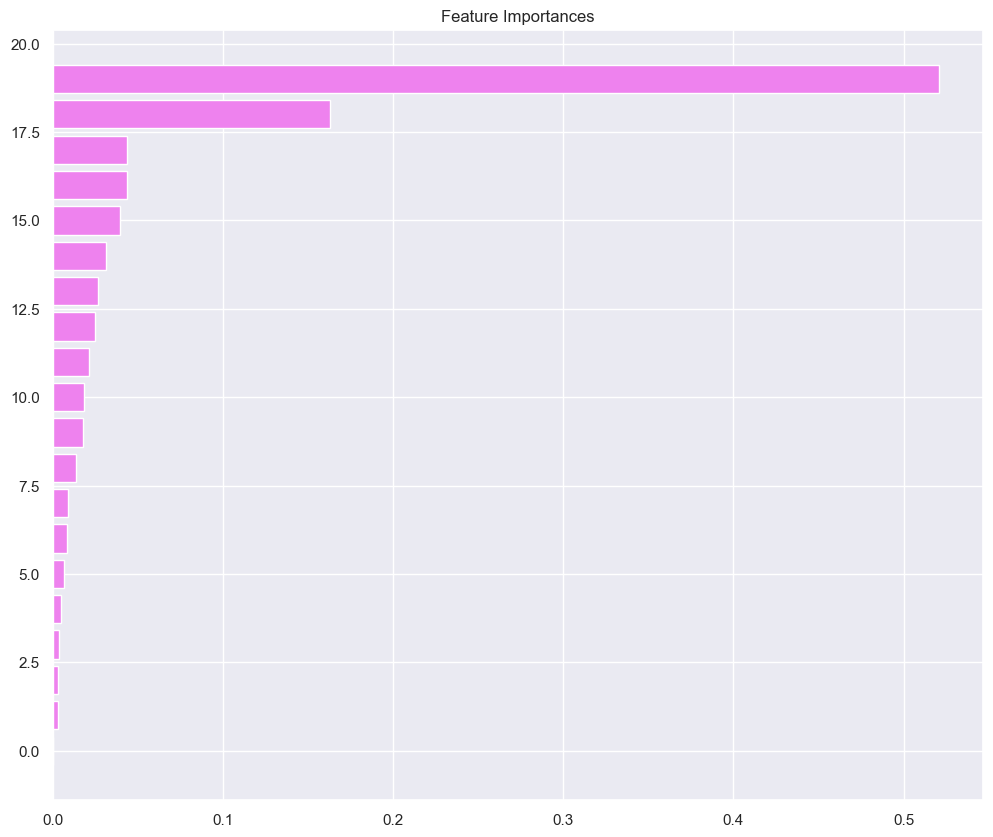

In [333]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


1. According to the decision tree model, income if the most important variable for predicting if a customer will take a personal Loan.

Model performance improvement
Gridsearch for Hyperparameter tuning to reduce overfitting


In [334]:
from sklearn.metrics import make_scorer, recall_score # Import make_scorer and recall_score

#choose the type of classifier
estimator = DecisionTreeClassifier(random_state=42)

#model = DecisionTreeClassifier(random_state=42

#grid of patameter to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
grid_object = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
df_grid = grid_object.fit(X_train, y_train)
# The error was in the next line, grid_obj was not defined,
# it should be grid_object
grid_object = grid_object.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_object.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)
DecisionTreeClassifier(class_weight={0: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=42)

DecisionTreeClassifier(class_weight={0: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=42)

Model performance on training set

In [ ]:
decision_tree_tune_performance_train = model_performance_classification(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
# Model performance on test set

decision_tree_tune_perf_test = model_performance_classification(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

In [ ]:
from sklearn.metrics import make_scorer, recall_score # Import make_scorer and recall_score

#choose the type of classifier
estimator = DecisionTreeClassifier(random_state=42)

#model = DecisionTreeClassifier(random_state=42

#grid of patameter to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)

df_grid = grid_obj.fit(X_train, y_train)


In [335]:
# Use the best estimator found by GridSearchCV
best_estimator = grid_obj.best_estimator_  # Access the best estimator
confusion_matrix_sklearn(best_estimator, X_test, y_test)




NameError: name 'grid_obj' is not defined

Visualizing  the decision tree

In [336]:
plt.figure(figsize=(12, 8))
# Pass the best_estimator instead of estimator
out = tree.plot_tree(
    best_estimator,  # Changed to best_estimator
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

NameError: name 'best_estimator' is not defined

<Figure size 1200x800 with 0 Axes>

In [337]:
# Test report showing the rules of a decision tree

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

NameError: name 'feature_names' is not defined

In [338]:
# Gini importance of features in the tree building

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [339]:
importnaces = estimator.feature_importances_
indices = np.argsort(importances

                     plt.figure = (12, 10)
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

SyntaxError: '(' was never closed (3580415251.py, line 2)

Observations:
n tuned decision tree Education and Income are the most important features, followed by Family size.

In [ ]:
pd.DataFrame(path)

NameError: name 'ccp_alphas' is not defined

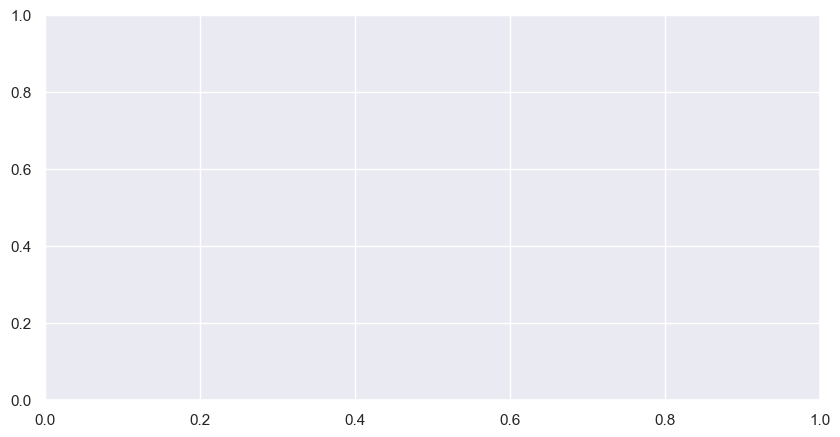

In [340]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total impurity vs Effective alpha for training set")
plt.show()

We need to train the decision tree using the effective alphas. The last value in the alphas is the alpha value that prunes the whole tree, leaving the tree clfs[-1], with one node

In [341]:
# Training the decision tree using the effective alphas

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(
    "Number of nodes in the last tree is : {} with ccp_alpha : {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


NameError: name 'ccp_alphas' is not defined

In [325]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-

                        node_counts = [clf.tree_.node_count for clf in clfs]
                        depths = [clf.tree_.max_depth for clf in clfs]
                        fig, ax = plt.subplots(2, 1). figsize=(10, 10)
                        ax[0].plot(
                            ccp_alphas, node_counts, marker="o", drawstyle="steps-post"
                        )
                        ax[0].set_xlabel("alpha")
                        ax[0].set_ylabel("number of nodes")
                        ax[0].set_title("Number of nodes vs alpha")
                        ax[1].plot(
                            ccp_alphas, depths, marker="o", drawstyle="steps-post"
                        )
                        ax[1].set_xlabel("alpha")
                        ax[1].set_ylabel("depth of tree")
                        ax[1].set_title("Depth vs alpha")
                        fig.tight_layout()
                        plt.show()

SyntaxError: '[' was never closed (1540806865.py, line 2)

In [326]:
recall_train = []

for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)


NameError: name 'clfs' is not defined

In [ ]:
recall_test = []

for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The maximum value of Recall is around 0.01 alpha, for both train and test sets

In [ ]:
# Creating the model where we get highest train and test recall

index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
Model performance on training set¶

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
Model performance on test set¶

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

Observations

* The results have improved from the initial model
* The model is giving a generalized performance on training and test set

In [ ]:
#Visualizing the decision tree

plt.figure(figsize=(10, 8))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()



In [ ]:
# Text report showing the rules of a decision tree

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

In [146]:
# Gini importance of features in the tree building

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

NameError: name 'best_model' is not defined

In [ ]:

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


Observations

Income is the most important feature to predict if the customer will borrow a personal loan
Followed by Family size, Education and the CCAvg

In [1]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison : ")
models_train_comp_df

NameError: name 'pd' is not defined

## Model Performance Comparison and Final Model Selection

In [343]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf
        test.T,
        ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree Sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Random Forest"
]
print("Test performance comparison : ")
models_test_comp_df

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3984212527.py, line 7)

Conclusion¶
Decision tree model with pre-pruning has given the best recall score on training data
Decision tree model with post-pruning has given the best recall score on test set
The tree with post pruning is not complex and is easy to interpret

## Logistic Regression and Decision Tree

Model comparison

Logistic Regression

Outliers were treated
Variables with multicollinearity and a p>0.05 were dropped in the process of model building
Highest Recall in the test set is 0.89, with a threshold of 0.079, allowing comparable values in train and test sets
Able to interpret that a unit increase in any of the variables (Income, Family, CCAvg, CD_Account, Education levels, Riverside County) will increase the odds of a customer taking a personal loan
Decision Tree

Outliers and multicollinear variables were not treated since they have no effect on the Decision Tree
Highest Recall in the test set is 0.986, with a post-pruned decision tree, giving comparable values in both train and test sets
Able to interpret that Income, Family, Education and CCAvg hold more importance in predicting if a customer will borrow a personal loan

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

In [344]:
Recommendations
The marketing team should target customers with . . .

An average annual income above 120K doallars
Education levels graduate and advanced / professional
A family size of three and above
Certificate of deposit account in the bank
A higher spending rate on credit cards (>2.5K dollars per month)
House mortgage in general
Age above 35 years
Experience above nine years for better outcomes
And customers from LA, Santa Clara, San Diego and Riverside Counties for favorable effects

SyntaxError: invalid decimal literal (1952259959.py, line 4)

___